# ▷ 바로가기 이동

### 1. [LMS Node Review](#5-2.-데이터를-준비하자!)

### 2. [Exploration Project 05. 인공지능과 가위바위보 하기](#exploration-project-05)

<hr>

### 5-2. 데이터를 준비하자!

#### MNIST 숫자 손글씨 Dataset 불러들이기

<hr>

오늘은 텐서플로우(TensorFlow)의 표준 API인 tf.keras의 Sequential API를 이용하여 숫자 손글씨 인식기를 만들 거예요.<br>
구글(Google)에서 오픈소스로 제공하는 텐서플로우는 가장 널리 사용되고 있는 머신러닝 라이브러리 중 하나입니다.<br>
앞으로 딥러닝 구현 실습은 Tensorflow 버전 2.6.0에서 진행될 예정입니다.<br>
자, 그럼 TF 2.6.0이 설치된 환경에서 먼저 다음의 코드를 실행해 봅시다.<br>
앞으로 보게 될 코드의 구체적인 의미와 메커니즘은 이후에 더 자세하게 배우게 될 테니, 지금은 완벽하게 이해하지 못하더라도 마음 편하게 실행해 보세요.

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os


print(tf.__version__)   # Tensorflow의 버전을 출력

mnist = keras.datasets.mnist

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

print(len(x_train))  # x_train 배열의 크기를 출력

2.10.0
11490434/11490434 [==============================] - 0s 0us/step
60000


위 코드를 실행하면 숫자 손글씨 데이터베이스인 MNIST 데이터셋을 읽을 수 있습니다. <br>
MNIST 데이터셋은 Yann Lecun 교수님이 공개한 데이터로서, 아래 페이지에 방문하면 자세한 내용을 확인할 수 있습니다.<br>

- [MNIST Dataset](http://yann.lecun.com/exdb/mnist/)

Q2. 숫자 손글씨 이미지의 크기는 무엇일까요? "nxn"(n은 정수)의 형태로 나타내 보세요.
 - 28x28

Q3. MNIST dataset에는 총 몇 장의 손글씨 이미지가 있을까요?
 - 70000, 60000장의 training set과 10000장의 test set으로 구성

Q4. 학습용 데이터(training set)은 대략 몇명의 손글씨가 들어있을까요?
 - 250


자, 한번 불러들인 숫자 손글씨 이미지 하나를 출력해볼까요?<br>
MNIST 데이터셋의 X항목(위 코드에서는 x_train, x_test)은 이미지 데이터를 담은 행렬(matrix)입니다.

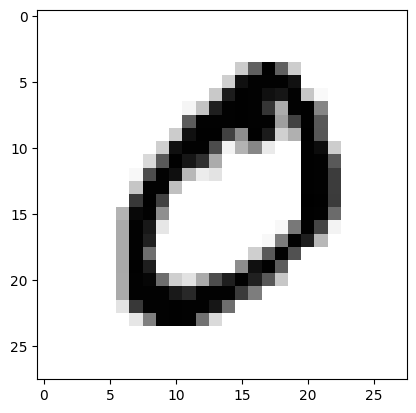

In [2]:
plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.show()

숫자 0 이미지가 나왔나요? 주의할 것은, x_train[1]에 담긴 이미지는 x_train 행렬의 1번째가 아니라 2번째 이미지라는 점입니다.<br>
1번째 이미지는 x_train[0]에 담겨 있습니다.<br>

그렇다면 Y항목에는 어떤 값이 들어 있을까요? y_train 행렬의 2번째 값을 확인해 봅시다.

In [3]:
print(y_train[1])

0


네, Y항목(위 코드의 y_train, y_test)에는 X항목에 들어있는 이미지에 대응하는 실제 숫자 값이 담겨 있는 것을 확인하실 수 있습니다.<br>
그럼 이번에는 또 다른 이미지를 출력해볼까요?

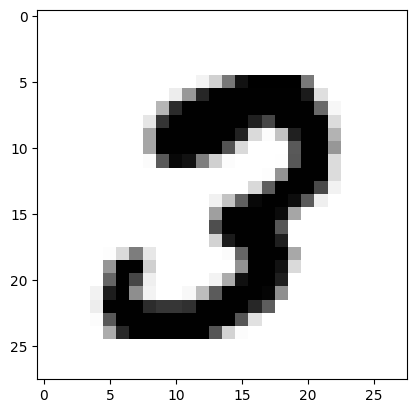

12346 번째 이미지의 숫자는 바로  3 입니다.


In [4]:
# index에 0에서 59999 사이 숫자를 지정해 보세요.
index=12345     
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ',  y_train[index], '입니다.')

참고: Matplotlib 이란?

파이썬에서 제공하는 시각화(Visualization) 패키지인 Matplotlib은 차트(chart), 플롯(plot) 등 다양한 형태로 데이터를 시각화할 수 있는 강력한 기능을 제공합니다.<br>
어떤 유용한 기능이 제공되는지 Matplotlib 공식홈페이지에서 제공하는 다양한 활용 예제들을 통해 직접 확인해 보세요.

- [Matplotlib 활용사례 보기](https://matplotlib.org/cheatsheets/)

#### 학습용 데이터와 시험용 데이터<br>
<hr>

위 코드를 다시 살펴봅시다.

~~~
(x_train, y_train), (x_test, y_test) = mnist.load_data()
~~~

mnist.load( ) 함수를 통해 학습용 데이터 (x_train, y_train)와 시험용 데이터 (x_test, y_test)를 나누어서 받아들이는 것을 볼 수 있는데요.<br>

우리가 만든 숫자 손글씨 분류기는 학습용 데이터 (x_train, y_train)만을 가지고 학습시킵니다.<br>
학습이 끝난 후에는 이 손글씨 분류기가 얼마나 좋은 성능을 보이는지 확인해보고 싶을 텐데요, 이 때 시험용 데이터(x_test,y_test)로 테스트를 할 수 있습니다.<br>

MNIST 데이터셋은 약 500명 사용자가 작성한 숫자 이미지를 가지고 있습니다.<br>
그 중 250여명의 데이터가 학습용 데이터로, 다른 250여명의 데이터가 시험용 데이터로 이용됩니다.

자 그러면 우리가 불러들인 학습용 데이터는 과연 몇 장일까요? 아래 코드를 실행시켜 봅시다.

In [5]:
print(x_train.shape)

(60000, 28, 28)


아마도 (60000,28,28) 이라는 값을 보실 수 있을 겁니다.<br>
이것은 28x28 크기의 숫자 이미지가 60,000장이 있다는 뜻인데요.<br>
마찬가지로 시험용 데이터의 개수를 확인하고 싶다면 아래 코드를 실행하면 됩니다.

In [6]:
print(x_test.shape)

(10000, 28, 28)


10,000장의 시험용 데이터가 저장되어 있음을 알 수 있습니다.<br>
아래 참고 자료를 읽어보시면 학습용 데이터, 검증용 데이터, 그리고 시험용 데이터의 의미와 그 차이점을 보다 자세히 파악할 수 있습니다.
 
 - [학습용 데이터, 검증용 데이터, 시험용 데이터](https://ganghee-lee.tistory.com/38)

Q5. 언제 검증용 데이터(validation set)를 사용하나요?

 - 머신러닝 학습 과정이 정상적으로 진행되고 있는지, 오버피팅이 발생하고 있지 않은지, 학습을 중단해도 되는지 등을 확인하고 싶을 때

 Q6. 교차 검증(cross validation) 기법을 옆 친구와 서로 토론하며 이해해봅시다.

 

#### 데이터 전처리 하기

<hr>

숫자 손글씨 이미지의 실제 픽셀 값은 0~255 사이의 값을 가집니다. 한번 확인해 볼까요?

In [7]:
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

최소값: 0  최대값: 255


인공지능 모델을 훈련시키고 사용할 때, 일반적으로 입력은 0~1 사이의 값으로 정규화 시켜주는 것이 좋습니다.<br>
MNIST 데이터는 각 픽셀의 값이 0~255 사이 범위에 있으므로 데이터들을 255.0 으로 나누어주면 됩니다.<br>
최소값이 0, 최대값이 1에 근접하도록 나오는지 확인해 봅시다.

In [8]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


### 5-3. 딥러닝 네트워크 설계하기

#### Sequential Model을 사용해 보자

<hr>

데이터가 모두 준비가 되었다면 이제는 딥러닝 네트워크를 만들어야 합니다.<br>
이번 수업에서는 텐서플로우 케라스(tf.keras)에서 Sequential API라는 방법을 사용할 겁니다.<br>
Sequential API는 개발의 자유도는 많이 떨어지지만, 매우 간단하게 딥러닝 모델을 만들어낼 수 있는 방법입니다.<br>
여러분들은 이 방법을 통해 미리 정의된 딥러닝 레이어(layer)를 손쉽게 추가할 수 있습니다.

케라스에서 모델을 만드는 방법은 Sequential API 외에도 Functional API를 이용하는 방법,<br>
밑바닥부터 직접 코딩하는 방법 등 여러 방법이 있습니다.<br>
공부하면서 하나씩 배워나갈 테니 걱정 마세요 :)

이번 수업의 목적은 여러분들에게 딥러닝 네트워크의 모든 것을 가르치는 것이 아닙니다.<br>
빠르게 다양한 응용 예들을 접해보고, 주어진 코드를 다른 데이터에 활용을 해보는 경험을 전달해 드리는 것이 그 목적입니다.<br>
따라서 코드의 내용이 당장 이해가 안 가더라도 부담가지지 않으셔도 됩니다.<br>
최대한 이해를 하려 노력은 하되, 프로그램 수행 결과에서 재미를 느끼는 것이 무엇보다도 중요합니다.<br>

다음의 코드는 tf.keras의 Sequential API를 이용하여 LeNet이라는 딥러닝 네트워크를 설계한 예입니다.<br>
8줄밖에 안되는 간단한 코드이지만, 손글씨 숫자 분류기를 구현하는 데는 충분합니다.

In [9]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


이런 간단한 코드만으로도 숫자 손글씨를 인식해 낼 수 있다면,<br>
IoT 농장에서 귤이 잘 익었는지 아닌지 판단한다거나,<br>
사진 속 인물이 웃고 있는지 무표정인지 파악을 하는 것도 어렵지 않을 겁니다.<br>
코드의 간단한 의미는 다음과 같습니다.

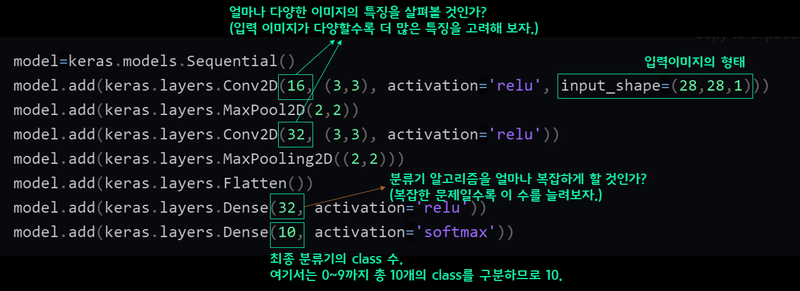

- Conv2D 레이어의 첫 번째 인자는 사용하는 이미지 특징의 수입니다.<br> 
여기서는 16과 32를 사용했습니다.<br>
가장 먼저 16개의 이미지 특징을, 그 뒤에 32개의 이미지 특징씩을 고려하겠다는 뜻입니다.<br>
우리의 숫자 이미지는 사실 매우 단순한 형태의 이미지입니다.<br>
만약 강아지 얼굴 사진이 입력 이미지라면 훨씬 디테일하고 복잡한 영상일 것입니다.<br>
그럴 경우에는 이 특징 숫자를 늘려주는 것을 고려해 볼 수 있습니다.

- Dense 레이어의 첫 번째 인자는 분류기에 사용되는 뉴런의 숫자 입니다.<br>
이 값이 클수록 보다 복잡한 분류기를 만들 수 있습니다.<br>
10개의 숫자가 아닌 알파벳을 구분하고 싶다면, 대문자 26개, 소문자 26개로 총 52개의 클래스를 분류해 내야 합니다.<br>
그래서 32보다 큰 64, 128 등을 고려해 볼 수 있을 것입니다.

- 마지막 Dense 레이어의 뉴런 숫자는 결과적으로 분류해 내야 하는 클래스 수로 지정하면 됩니다.<br>
숫자 인식기에서는 10, 알파벳 인식기에서는 52가 되겠지요.

5번째 스텝인 얼마나 잘 만들었는지 확인하기에서 이 코드를 수정해 볼 것입니다.<br>
지금은 일단 실행하는 데 초점을 맞춥시다.

우리가 만든 딥러닝 네트워크 모델을 확인해 보려면, model.summary() 메소드를 이용하면 됩니다.

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 32)                2

### 5-4. 딥러닝 네트워크 학습시키기

우리가 만든 네트워크의 입력은 (데이터갯수, 이미지 크기 x, 이미지 크기 y, 채널수) 와 같은 형태를 가집니다.<br>
이전 스텝에서 첫 번째 레이어에 input_shape=(28,28,1)로 지정했던 것을 기억하시나요?<br>
그런데 print(x_train.shape) 을 해보면, (60000, 28, 28) 로 채널수에 대한 정보가 없습니다.<br>
따라서 (60000, 28, 28, 1) 로 만들어 주어야 합니다<br>
(여기서 채널수 1은 흑백 이미지를 의미합니다. 컬러 이미지라면 R, G, B 세 가지 값이 있기 때문에 3이겠죠?).

In [11]:
print(f"Before Reshape - x_train_norm shape: {x_train_norm.shape}")
print(f"Before Reshape - x_test_norm shape: {x_test_norm.shape}")

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print(f"After Reshape - x_train_reshaped shape: {x_train_reshaped.shape}")
print(f"After Reshape - x_test_reshaped shape: {x_test_reshaped.shape}")

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


그러면 이제 x_train 학습 데이터로 딥러닝 네트워크를 학습시켜 봅시다.<br>
여기서 epochs=10 은 전체 60,000개의 데이터를 10번 반복 사용해서 학습을 시키라는 뜻입니다.<br>
물론 model의 입력 정의에 형태를 맞춘 x_train_reshaped가 사용되어야겠죠.<br>
자 그러면 코드를 실행해 봅시다.

In [12]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1954 - accuracy: 0.9402
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0608 - accuracy: 0.9809
Epoch 3/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0440 - accuracy: 0.9859
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0346 - accuracy: 0.9890
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0286 - accuracy: 0.9912
Epoch 6/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0229 - accuracy: 0.9931
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0191 - accuracy: 0.9938
Epoch 8/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0159 - accuracy: 0.9949
Epoch 9/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0141 - accuracy: 0.9955
Epoch 10/10
1875/1875 [==============================] - 15s 8ms/step - l

각 학습이 진행됨에 따라 epoch 별로 어느 정도 인식 정확도(accuracy)가 올라가는지 확인할 수 있습니다.<br>
인식 정확도가 0.9413에서 0.9957까지 매우 높게 올라가는군요.
9 epoch정도부터는 인식률의 상승이 미미합니다.<br>
10 epoch정도 학습을 시키면 충분할 것 같네요. (학습할 때마다 인식 정확도는 변동됩니다.)

### 5-5. 얼마나 잘 만들었는지 확인하기

#### 테스트 데이터로 성능을 확인해 보자

<hr>

사실 위의 인식 정확도는 학습용 데이터(x_train)을 가지고 구한 것입니다.<br>
즉, 연습문제를 잘푸는 인공지능을 만든 거죠.<br>
우리가 만든 딥러닝 네트워크는 실제 시험도 잘 볼 수 있을까요?<br>
자 그러면 시험용 데이터(x_test)를 가지고 확인해 봅시다.

In [13]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

313/313 - 1s - loss: 0.0384 - accuracy: 0.9890 - 1s/epoch - 4ms/step
test_loss: 0.03839348629117012
test_accuracy: 0.9890000224113464


결과가 어떻게 나오나요?<br>
99.57점을 받을 줄 알았는데, 98.85로 시험점수가 소폭 하락했네요.<br>
(학습할 때마다 test_loss, test_accuracy 도 변동됩니다.)<br>
역시 연습문제보다 실제 시험문제가 더 어려운가 봅니다.<br>
위 MNIST 데이터셋 참고문헌을 보시면 학습용 데이터와 시험용 데이터의 손글씨 주인이 다른 것을 알 수 있습니다.<br>
즉, 한 번도 본 적이 없는 필체의 손글씨가 섞여 있을 가능성이 높습니다.<br>
어찌 보면 인식률이 떨어지는 것은 어느 정도 예상 가능한 일이었습니다.

#### 어떤 데이터를 잘못 추론했을까? 눈으로 확인해 보자

<hr>

model.evaluate() 대신 model.predict()를 사용하면 model이 입력값을 보고 실제로 추론한 확률분포를 출력할 수 있습니다.<br>
우리가 만든 model이란 사실 10개의 숫자 중 어느 것일지에 대한 확률값을 출력하는 함수입니다.<br>
이 함수의 출력값, 즉 확률값이 가장 높은 숫자가 바로 model이 추론한 숫자가 되는 거죠.

In [14]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

313/313 [==============================] - 1s 3ms/step
model.predict() 결과 :  [5.2579937e-12 1.1457793e-12 2.3412602e-10 5.8238081e-09 6.5521338e-12
 1.0379075e-11 1.3538845e-16 9.9999988e-01 1.5839478e-12 1.6300372e-07]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


model.predict() 결과가 [9.5208375e-15 2.8931768e-11 1.2696462e-09 2.0265421e-08 6.1321614e-11 2.9599554e-12 1.0710074e-15 1.0000000e+00 1.0549885e-11 3.8589491e-08] 와 같이 벡터 형태로 나왔나요?<br>
이 벡터는 model이 추론한 결과가 각각 0, 1, 2, ..., 7, 8, 9일 확률을 의미합니다.

이 경우라면 model이 추론한 결과가 7일 확률이 1.00에 근접하고 있다,<br>
즉 이 model은 입력한 이미지가 숫자 7이라는 걸 아주 확신하고 있다는 뜻이 됩니다.

정말 숫자 7인가요?

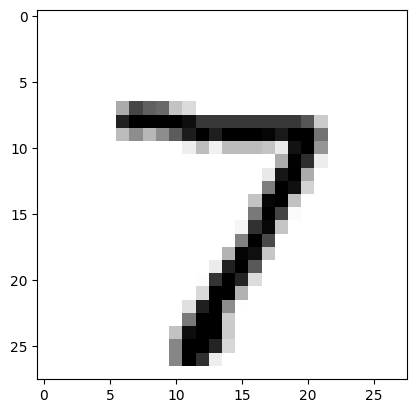

In [15]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

그렇다면 model이 추론해 낸 숫자와 실제 라벨의 값이 다른 경우는 어떤 경우인지 직접 확인해 볼 수도 있겠습니다.

예측확률분포: [1.8770642e-07 5.0727856e-08 9.4477208e-08 1.7881464e-02 1.2185217e-07
 1.0776433e-05 2.2069646e-09 1.2694452e-10 9.8206067e-01 4.6538855e-05]
라벨: 3, 예측결과: 8


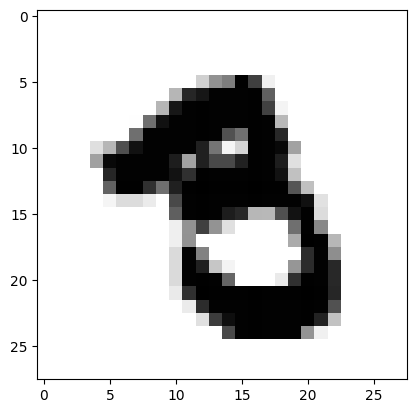

예측확률분포: [4.0405821e-06 1.4594916e-07 6.1516559e-01 3.3472679e-03 6.0969960e-06
 1.0658218e-06 6.1639781e-08 3.8140571e-01 9.8627843e-06 6.0209866e-05]
라벨: 7, 예측결과: 2


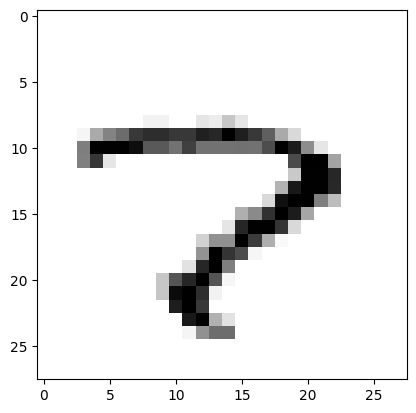

예측확률분포: [1.9428568e-01 6.4912120e-15 5.4483049e-16 1.0744603e-17 1.9950470e-09
 1.9168045e-08 8.0571425e-01 1.0669333e-16 4.6808613e-11 3.3896191e-17]
라벨: 0, 예측결과: 6


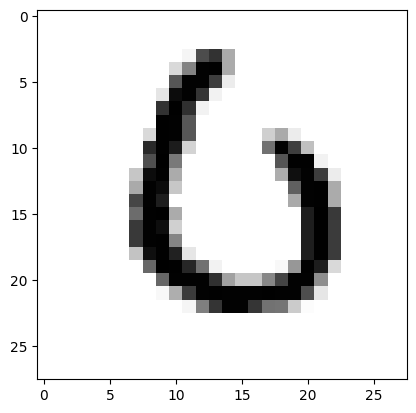

예측확률분포: [1.1680162e-08 2.9879081e-07 1.0639002e-09 4.0580939e-09 4.3382734e-01
 2.0913976e-07 1.3410521e-11 2.4134443e-04 2.5866353e-05 5.6590497e-01]
라벨: 4, 예측결과: 9


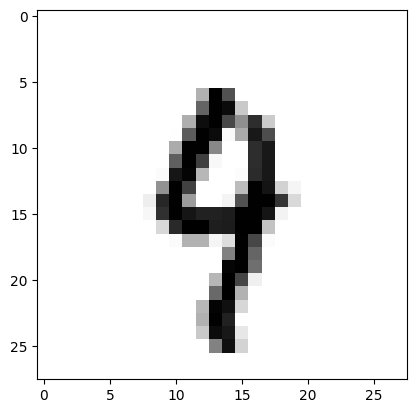

예측확률분포: [3.0269946e-06 4.6706224e-05 1.9358304e-06 5.2742776e-02 7.9827345e-07
 9.4349444e-01 1.1510419e-06 5.5254992e-07 1.7755864e-03 1.9331556e-03]
라벨: 9, 예측결과: 5


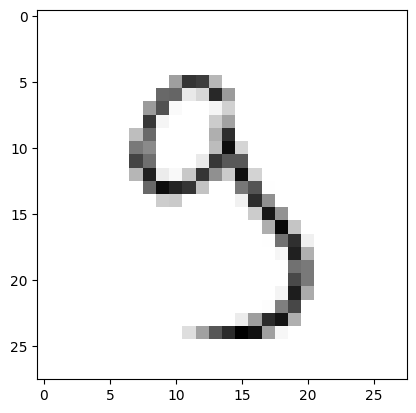

In [16]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

틀린 경우를 살펴보면 model도 추론 결과에 대한 확신도가 낮고 매우 혼란스러워 한다는 것을 알 수 있습니다.<br>
model의 추론 결과를 시각화하여 살펴보는 것은 향후 model 성능 개선에 도움이 되는 아이디어를 얻을 수 있는 좋은 방법 중 하나입니다.

### 5-6. 더 좋은 네트워크 만들어 보기


그러면 인식률을 99점대로 만들 수 없을까요?<br>
딥러닝 네트워크의 구조 자체는 바꾸지 않으면서도 우리가 해볼 수 있는 것들이 있습니다.<br>
3번째 스텝 딥러닝 네트워크 설계하기에서 살펴본 하이퍼파라미터들을 바꾸어 보는 것인데요.<br>
Conv2D 레이어에서 입력 이미지의 특징 수를 늘리거나 줄여 보거나,<br>
Dense 레이어에서 뉴런수를 바꾸어 보거나, 학습 반복 횟수인 epoch 값을 변경해 볼 수 있을 겁니다.



In [17]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

Q7. 하이퍼파라미터를 바꾸어가면서 시험용 데이터(x_test)에 대한 인식률을 확인해 봅시다.<br>
최고로 높은 점수를 얻은 네트워크 모델 코드와 그 때의 시험용 데이터 인식률 값을 올려주세요.

<hr>

### 5-7. 미니 프로젝트 : 가위바위보 분류기를 만들자

오늘 배운 내용을 바탕으로 가위바위보 분류기를 만들도록 하겠습니다.<br>
가장 먼저 해야 할 일은 뭘까요?<br>
네, 첫 번째!!!! 데이터를 준비해야 합니다.<br>
가위바위보 이미지를 모아 놓은 곳은 없으므로, 우리가 직접 사진을 찍어서 모아봅시다.



#### 라이브러리 버전을 확인해 봅니다

<hr> 

사용할 라이브러리 버전을 둘러봅시다.

In [18]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.10.0
1.23.2


#### 데이터를 준비하자

<hr>

🔶 데이터 만들기

(1) 우리는 노트북 전면 카메라를 활용하여 가위, 바위, 보 이미지 각 100장을 만들어 볼거예요.<br>
그런데 300장을 어느 세월에 만들까요?

걱정하지 마세요.<br>
구글의 teachable machine 사이트에서 쉽게 데이터를 만들어볼 수 있습니다.<br>
아래 사이트에서 Get Started 버튼을 눌러보세요.<br>
그 다음, Image Project - Standard image model을 선택하면,<br>
Webcam을 구동해 클래스별 이미지 데이터를 직접 촬영해서 만들 수 있는 멋진 화면이 나타납니다.

- [https://teachablemachine.withgoogle.com](https://teachablemachine.withgoogle.com)

(2) 먼저 가위 이미지 데이터를 만들어 봅시다.<br>
웹캠 앞에 가위 포즈를 취하면서 <Hold to Record> 버튼을 누르면 이미지가 캡쳐됩니다.<br>
딥러닝 모델이 인식하기 좋게끔 여러분들 손이 잘 보이게 찍어주세요.

여러 각도에서 찍어보세요.<br>
여러 크기로 찍어보세요.<br>
혼자하면 다양한 각도와 크기를 저장할 수 없으니, 옆 동료와 함께 하세요.<br>
좋은 데이터가 좋은 결과를 낳는다는 것을 꼭 기억하세요.

(3) 100장의 가위 이미지를 캡쳐했다면, 우상단의 메뉴 아이콘을 눌러 다운로드 합니다.

(4) 가위 이미지들을 "scissor.zip"이라는 파일 이름으로 본인 컴퓨터에 저장해주세요.<br>
바위와 보 이미지들에 대해서도 위 과정을 진행하세요. (각각 "rock.zip", "paper.zip" 이름으로 저장해주세요.)


__데이터 불러오기 + Resize 하기__

(5) 숫자 손글씨의 경우 이미지 크기가 28x28 이었기 때문에, 우리의 가위, 바위, 보 이미지도 28x28로 만들어야 합니다.<br>
이를 위해서는 PIL 라이브러리를 사용해볼 거예요. 그러려면 먼저 라이브러리를 불러와야 겠죠?



In [9]:
from PIL import Image
import glob
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


이제 가위 이미지를 불러와서 28x28 사이즈로 변경할 겁니다.<br>
아래 코드를 실행해보세요.<br>
이미지의 크기가 28x28 로 바뀌었나요?

In [10]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")

In [11]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# image_dir_path = os.getenv("HOME") + "./aiffel/rock_scissor_paper/scissor"
image_dir_path = "./aiffel/rock_scissor_paper/train/_scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

1966  images to be resized.


C:\Users\triac\AppData\Local\Temp\ipykernel_23304\342146961.py:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size,Image.ANTIALIAS)


1966  images resized.
가위 이미지 resize 완료!


자 그러면, 남은 이미지도 28x28 로 만들어 볼까요?

In [12]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# image_dir_path = os.getenv("HOME") + "./aiffel/rock_scissor_paper/rock"
image_dir_path = "./aiffel/rock_scissor_paper/train/_rock"
resize_images(image_dir_path)

print("바위이미지 resize 완료!")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# image_dir_path = os.getenv("HOME") + "./aiffel/rock_scissor_paper/paper"
image_dir_path = "./aiffel/rock_scissor_paper/train/_paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

1962  images to be resized.


C:\Users\triac\AppData\Local\Temp\ipykernel_23304\342146961.py:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size,Image.ANTIALIAS)


1962  images resized.
바위이미지 resize 완료!
2059  images to be resized.
2059  images resized.
보 이미지 resize 완료!


(6) 숫자 손글씨 인식기는 mnist.load_data() 라는 함수로 데이터를 읽었던 것 기억하시죠?<br>
여러분들이 아직 코딩에 익숙하지 않을 수 있으므로, <br>
가위, 바위, 보 데이터를 읽을 수 있는 load_data() 함수를 만들어 드릴 거예요. <br>
이 코드를 활용하면 임의의 사진 데이터<br>
(ex. 귤이 잘 익었나, 안 익었나? 웃는 얼굴인가, 우는 얼굴인가, 평범한 표정의 얼굴인가? 등)<br>
에 적용하실 수 있을 겁니다.

load_data() 함수는 입력으로 이미지가 있는 폴더 위치를 받습니다.<br>
여기서는 rock_scissor_paper 폴더 위치를 적어주면 됩니다.<br>
숫자 손글씨는 0~9 까지의 클래스가 있었던 것 기억하시죠?<br>
가위바위보의 경우 3개의 클래스 즉, 가위: 0, 바위: 1, 보: 2 로 라벨링이 될 것입니다.

In [13]:
import numpy as np

def load_data(img_path, number_of_data=5987):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size = 28
    color = 3
    # 이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs = np.zeros(number_of_data * img_size * img_size * color, dtype=np.int32)\
        .reshape(number_of_data, img_size, img_size, color)
    labels = np.zeros(number_of_data, dtype=np.int32)

    idx = 0
    for file in glob.iglob(img_path + "/scissor/*.jpg"):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 0   # 가위 : 0
        idx = idx + 1

    for file in glob.iglob(img_path + "/rock/*.jpg"):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:] = img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 1   # 바위 : 1
        idx = idx + 1  
    
    for file in glob.iglob(img_path+"/paper/*.jpg"):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:] = img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 2   # 보 : 2
        idx = idx + 1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

# image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
image_dir_path = "./aiffel/rock_scissor_paper/train"
(x_train, y_train) = load_data(image_dir_path)

x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 5987 입니다.
x_train shape: (5987, 28, 28, 3)
y_train shape: (5987,)


한번 이미지를 불러 볼까요?

라벨:  0


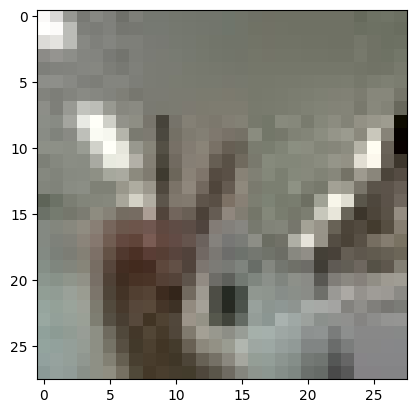

In [14]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

#### 테스트 데이터 구축

<hr>



In [16]:
# 가위 바위 보 Resize

## 가위 Resize
image_dir_path = "./aiffel/rock_scissor_paper/test/_scissor"
resize_images(image_dir_path)

## 바위 Resize
image_dir_path = "./aiffel/rock_scissor_paper/test/_rock"
resize_images(image_dir_path)

## 보 Resize
image_dir_path = "./aiffel/rock_scissor_paper/test/_paper"
resize_images(image_dir_path)


569  images to be resized.


C:\Users\triac\AppData\Local\Temp\ipykernel_23304\342146961.py:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size,Image.ANTIALIAS)


569  images resized.
1070  images to be resized.
1070  images resized.
513  images to be resized.
513  images resized.


In [17]:
import numpy as np

def load_data(img_path, number_of_data=2152):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/_scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/_rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/_paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

# image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
image_dir_path = "./aiffel/rock_scissor_paper/test"
(x_test, y_test) = load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

테스트데이터(x_test)의 이미지 개수는 2152 입니다.
x_test shape: (2152, 28, 28, 3)
y_test shape: (2152,)


In [19]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


#### 딥러닝 네트워크 설계하기

<hr>

자 이제 데이터의 준비가 끝났습니다.<br>
이제 여러분들이 가위바위보를 인식하는 딥러닝 네트워크를 설계해 볼까요?

In [32]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
# [[YOUR CODE]]
n_channel_1=48
n_channel_2=96
n_dense=96
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
# [[YOUR CODE]]
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


print(f"Before Reshape - x_train_norm shape: {x_train_norm.shape}")
print(f"Before Reshape - x_test_norm shape: {x_test_norm.shape}")

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 3)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 3)

print(f"After Reshape - x_train_reshaped shape: {x_train_reshaped.shape}")
print(f"After Reshape - x_test_reshaped shape: {x_test_reshaped.shape}")


# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)




Model에 추가된 Layer 개수:  7
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 48)        1344      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 48)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 96)        41568     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 96)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2400)              0         
                                                                 
 dense_2 (Dense)             (

In [33]:
# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

68/68 - 0s - loss: 26.7267 - accuracy: 0.2774 - 467ms/epoch - 7ms/step
test_loss: 26.726686477661133 
test_accuracy: 0.2774163484573364


# 27.7 ％ … 33％ 도 못넘기면 이게 정상인가

188/188 [==============================] - 1s 5ms/step
model.predict() 결과 :  [9.916169e-01 3.194080e-08 8.383057e-03]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


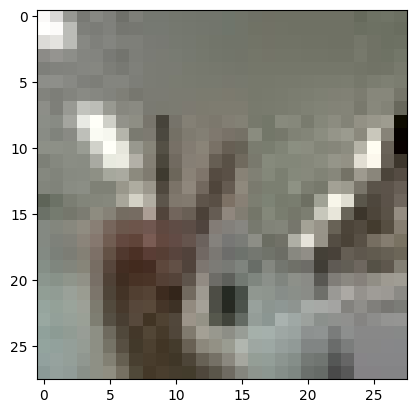

In [34]:
predicted_result = model.predict(x_train_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

plt.imshow(x_train[idx],cmap=plt.cm.binary)
plt.show()

68/68 [==============================] - 0s 6ms/step
model.predict() 결과 :  [1.0000000e+00 6.6628845e-16 6.4977596e-20]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


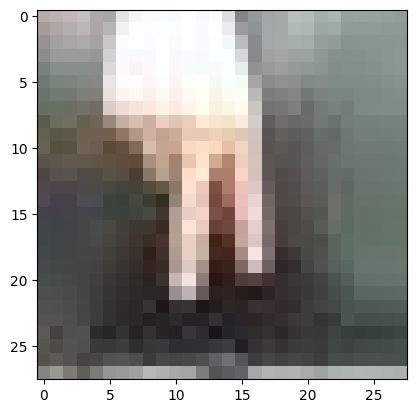

In [35]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [1.22565985e-11 9.99997497e-01 2.51067695e-06]
라벨: 0, 예측결과: 1


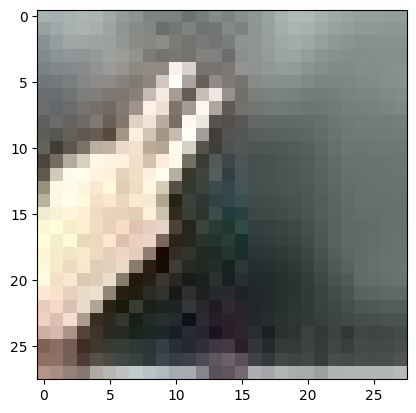

예측확률분포: [1.0000000e+00 7.7419905e-20 3.1085527e-11]
라벨: 1, 예측결과: 0


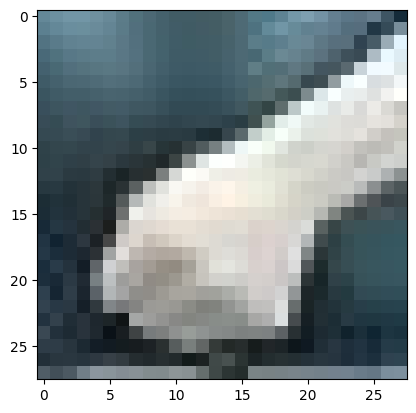

예측확률분포: [1.000000e+00 9.861909e-25 2.890340e-16]
라벨: 1, 예측결과: 0


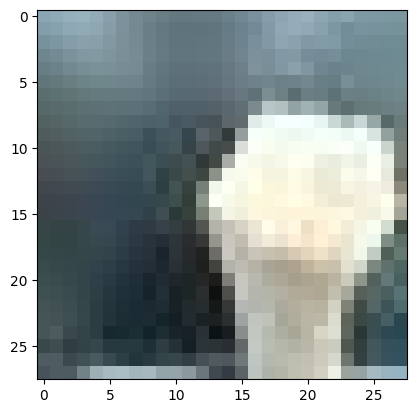

예측확률분포: [1.0000000e+00 2.1173408e-21 4.1438889e-15]
라벨: 1, 예측결과: 0


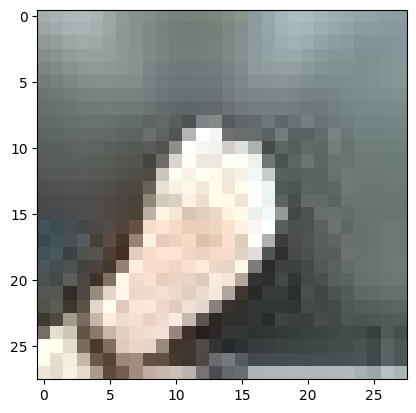

예측확률분포: [1.0000000e+00 2.4645064e-10 1.7030313e-11]
라벨: 2, 예측결과: 0


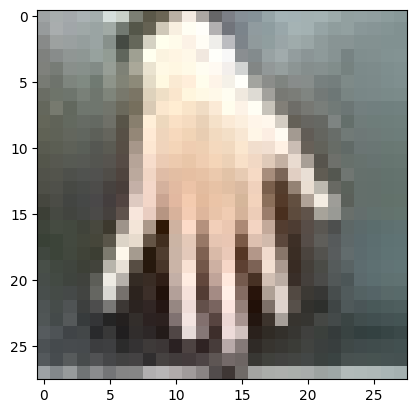

In [36]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

# ▲ 여기까지 LMS 학습노드의 내용 정리와 실험 내용들

<hr>

# Exploration Project 05
### Rock Paper Scissors

### ■ Exp.Node.05 내용 정리／요약

<hr>

#### ▶ 딥러닝 과정 : 데이터 준비 → 딥러닝 네트워크 설계 → 학습 → 테스트(평가)

#### ▶ TensorFlow？<br>
 
 - 구글(Google)에서 오픈소스로 제공하는 가장 널리 사용되고 있는 머신러닝 라이브러리 중 하나.<br>
 
 - 딥러닝 프로그램을 쉽게 구현할 수 있도록 다양한 기능을 제공해주는 라이브러리.  

 - Tensor？

   + Tensor(텐서)란 딥러닝에서 데이터를 표현하는 방식이라고 할 수 있다.<br>
 즉, 텐서는 행렬로 표현할 수 있는 2차원 형태의 배열을, 높은 차원으로 확장한 다차원 배열이다.<br>

   + 예를 들어, 아래의 그림에서 볼 수 있듯이 회색조(grayscale) 이미지는<br>
    하나의 채널(channel)에 2차원 행렬(배열)로 나타낼 수 있다.<br>
    반면, RGB 이미지는 R(ed), G(reen), B(lue) 각 3개의 채널마다<br>
    2차원 행렬(배열)로 표현하는데, 이를 텐서(3차원의 값을 가지는 배열)로 표현할 수 있다.<br>
    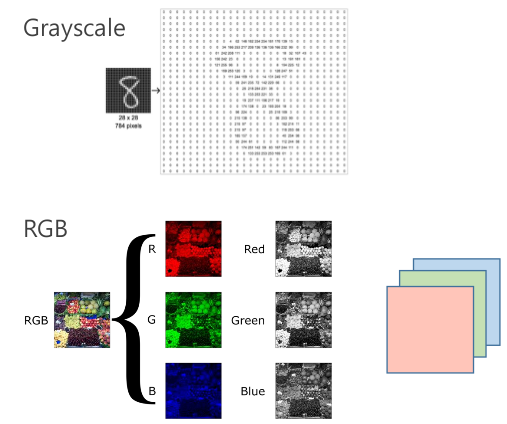


 - TenorFlow에서 계산은 데이터 흐름 그래프(dataflow graph)로 이루어 진다.<br>
 즉, 텐서 형태의 데이터들이 딥러닝 모델을 구성하는 연산들의 그래프를 따라 흐르면서 연산이 일어난다.

 - 딥러닝에서 데이터를 의미하는 Tensor 와 DataFlow Graph를 따라 연산이 수행되는 형태(Flow)를 합쳐<br>
  TensorFlow 란 이름이 나오게 되었다.


#### ▶ tf.keras 의 Sequential API
 
 - Keras？<br>

   + 딥 러닝 모델을 빌드하고 학습시키기 위한 TensorFlow의 상위 수준 API

   + 신속한 프로토타입 제작, 최첨단 연구 및 프로덕션에 사용
   
   + 다음과 같은 세 가지 주요 이점이 있다

     *  사용자 친화적<br>
     Keras의 인터페이스는 간단하며 일관성<br>
     Keras는 사용자 오류에 대해 명확하고 실행 가능한 피드백을 제공

     * 모듈식. 구성 가능.<br>
     거의 제한 없이 구성 가능한 빌딩 블록을 함께 연결하는 방식으로 생성

     * 쉬운 확장<br>
     연구를 위한 새로운 아이디어를 표현하는 맞춤 빌딩 블록을 작성<br>
     새로운 레이어, 측정항목, 손실 함수를 만들고 최첨단 모델을 개발
 
   + TensorFlow 의 표준 API
 
 - Sequential Model？<br>
   
   + 순차적으로 레이어 층을 더해서 쌓는다.<br>
   Sequential groups a linear stack of layers into a tf.keras.Model.<br>
&nbsp;
<br>   

 - [Keras - About Keras](https://keras.io/about/)

 - [Keras - The Sequential class](https://keras.io/api/models/sequential/)


<hr>

<div id='project_body'/>

## ■ 인공지능과 가위바위보 하기<a name="project_body"></a>

### 1) 데이터 준비

#### 1-1. 라이브러리 import

우선 필요한 데이터들을 준비해보자.

필요한 라이브러리는 아래와 같다.

In [56]:
## Import Libs
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

## TensorFlow
import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings('ignore')   ## 경고 메시지 무시

from tqdm import tqdm
import time

print("TensorFlow ver. :", tf.__version__)   # Tensorflow의 버전을 출력
print("PIL 라이브러리 import 완료!")

TensorFlow ver. : 2.10.0
PIL 라이브러리 import 완료!


##### 1-2. 이미지 가져오기



이미지 트리 구조는 대강 아래와 같다.

~~~
os.getenv("HOME")
└─aiffel
    └─rock_scissor_paper
        ├─test        : test 사용할 데이터
        │  ├─paper
        │  ├─rock
        │  └─scissor
        └─train       : train 사용할 데이터
          ├─paper
          ├─rock
          └─scissor
~~~


여기서는 이미지를 일정한 가로세로 픽셀의 크기로 조정하여 저장하여 사용할 것이다.

resize_images 함수는 해당 경로 이하의 이미지들을 resize 하는 기능으로 구현했다.

두가지 알아두어야 할 점이 있다.

 - 이미지 크기를 줄이는 과정에서 Resampling filter 에<br>
  주관적으로 품질에 유리하다고 생각하는 Lanczos 알고리즘을 적용했다.

 - 사본은 원본을 덮어 씌우지 않고, test, train 폴더의 사본을 활용한다.<br>
 (train, test 에는 원본 유지, Resize 후의 사본은 _train, _test 에 저장)

In [59]:
def resize_images(img_path):
	
    images = glob.glob(img_path + "/**/*.jpg", recursive=True)
    print(len(images), " images to be resized.")

    ## 필요한 경로 만들기
    os.makedirs(img_path + "/_train", exist_ok=True)
    os.makedirs(img_path + "/_train/rock", exist_ok=True)
    os.makedirs(img_path + "/_train/paper", exist_ok=True)
    os.makedirs(img_path + "/_train/scissor", exist_ok=True)
    os.makedirs(img_path + "/_test", exist_ok=True)
    os.makedirs(img_path + "/_test/rock", exist_ok=True)
    os.makedirs(img_path + "/_test/paper", exist_ok=True)
    os.makedirs(img_path + "/_test/scissor", exist_ok=True)

    # 파일마다 모두 80x80 사이즈로 바꾸어 저장.
    target_size = (80, 80)
    for img in tqdm(images):

        old_img = Image.open(img)
        
        ## Resampling filter 로는 Lanczos 알고리즘을 사용할것이다.
        new_img = old_img.resize(target_size, Image.LANCZOS)
        
        ## 단순하게 저장경로의 문자열을 변경 하게했다.
        img = str.replace(img, "train", "_train")
        img = str.replace(img, "test", "_test")
        
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

기존에 28 x 28 크기로 Resize 하여 사용했었었는데,

28 x 28 이미지의 100％ 사이즈로는

상당히 손 모양을 판별하기 어렵다고 생각했다.

그래서 80 x 80 정도의 크기 이미지를 사용하려고 한다.

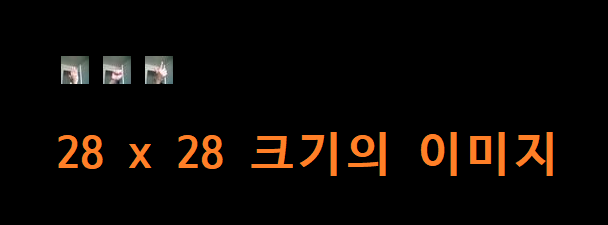

그 와중에 두번째 이미지는 열려있는 문짝이 절묘하게 손가락이 있어야할 부분과 겹쳐서

이게 뭔지 정말 가까이서 들여다 봐도 헷갈릴 것만 같다.

In [61]:
## 2307개, 3분 07초 정도 소요

## 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 Resize
image_dir_path = "./aiffel/rock_scissor_paper/"
resize_images(image_dir_path)
print(" → resize 완료！")
print("─" * 64)

2307  images to be resized.
2307  images resized.
 → resize 완료！
────────────────────────────────────────────────────────────────


##### 1-3. 이미지의 행렬 변환(np.array)과 라벨링

load_data 함수는 매개변수로 이미지 폴더 경로를 입력 받을 것이다.

원본 경로와 다르게 _train, _test 데이터 경로를 사용 할 것이다.

이 함수의 반환값은 train, test 각각 행렬변환한 이미지와 라벨값을 반환한다.

train 에서는 각각 x_train, y_train 을 결과로 반환 할 것이고,

test 에서는 각각 x_test, y_test 를 결과로 반환 할 것이다.

train, test 두 데이터가 서로 섞이지 않도록 유의해야 한다.

In [64]:
def load_data(img_path, number_of_data):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size = 80
    color = 3
    # 이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs = np.zeros(number_of_data * img_size * img_size * color, dtype=np.int32)\
        .reshape(number_of_data, img_size, img_size, color)
    labels = np.zeros(number_of_data, dtype=np.int32)

    print()
    print("─" * 64)
    print("불러올 이미지 개수는", number_of_data, "입니다.")

    idx = 0
    print(" → scissor : label 0")
    for file in tqdm(glob.iglob(img_path + "/scissor/*.jpg")):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 0   # 가위 : 0
        idx = idx + 1
    print(" → rock : label 1")
    for file in tqdm(glob.iglob(img_path + "/rock/*.jpg")):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 1   # 바위 : 1
        idx = idx + 1  
    print(" → paper : label 2")
    for file in tqdm(glob.iglob(img_path+"/paper/*.jpg")):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 2   # 보 : 2
        idx = idx + 1

    print("불러온 이미지 개수는", idx, "입니다.")
    print("─" * 64)

    return imgs, labels


이제 train, test 데이터들을 각 변수에 저장하는 일이 남았다.

In [65]:

image_dir_path = "./aiffel/rock_scissor_paper"

(x_train, y_train) = load_data(image_dir_path + "/_train", 1707)
(x_test, y_test) = load_data(image_dir_path + "/_test", 600)

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))


────────────────────────────────────────────────────────────────
불러올 이미지 개수는 1707 입니다.
 → scissor : label 0


548it [00:02, 243.08it/s]


 → rock : label 1


591it [00:02, 233.35it/s]


 → paper : label 2


568it [00:02, 242.67it/s]


불러온 이미지 개수는 1707 입니다.
────────────────────────────────────────────────────────────────

────────────────────────────────────────────────────────────────
불러올 이미지 개수는 600 입니다.
 → scissor : label 0


200it [00:00, 229.88it/s]


 → rock : label 1


200it [00:00, 250.13it/s]


 → paper : label 2


200it [00:00, 723.09it/s] 

불러온 이미지 개수는 600 입니다.
────────────────────────────────────────────────────────────────
x_train shape: (1707, 80, 80, 3)
y_train shape: (1707,)
x_test shape: (600, 80, 80, 3)
y_test shape: (600,)


이미지가 제대로 들어 갔는지 확인 해 보자.

Label :  0


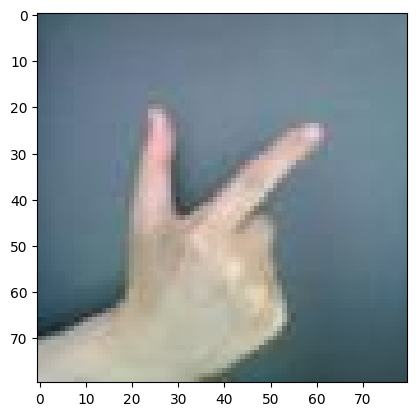

In [68]:
train_index = 0
print("Label : ", y_train[train_index])
plt.imshow(x_train[train_index])

Label :  1


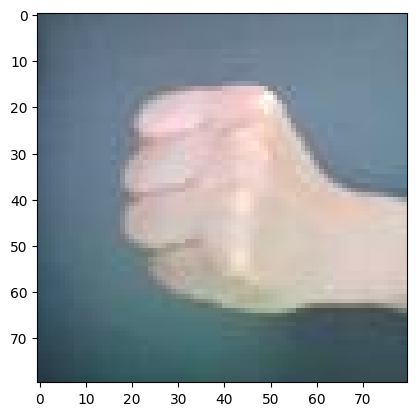

In [69]:
train_index = 800
print("Label : ", y_train[train_index])
plt.imshow(x_train[train_index])

Label :  2


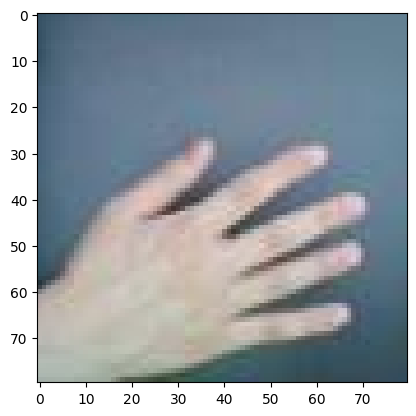

In [70]:
train_index = 1600
print("Label : ", y_train[train_index])
plt.imshow(x_train[train_index])

### 2) 딥러닝 네트워크 설계

#### 2-1. 모델 설계

Keras 의 Sequential API 를 사용하여,

MNIST 예시와 LMS 학습에 사용한 모델을 개량해서 딥러닝 네트워크를 설계하자.



테스트를 위해 하이퍼파라미터들도 미리 선언해 놓았다

Conv2D 레이어에서 n_channel 파라미터는 입력 이미지의 특징 수를 늘리거나 줄이는데 사용한다.

Dense 레이어에서 n_dense 는 뉴런수를 바꾸는 용도로 사용한다.

학습 반복 횟수인 epoch 값을 변경하는 n_train_epoch 는 

fit 과정에서 사용하지만, 같이 모아놓도록 했다.

input_shape 는 데이터(이미지)의 size 와 채널 수를 지정해준다.

여기에서는 80x80 의 컬러 이미지(3개 채널)를 사용한다.

마지막 Dense 레이어의 첫번째 인자는 class 갯수를 지정하는데,

가위, 바위, 보의 3개 class 로 분류를 하면 되므로 3 을 지정한다.

In [86]:
n_channel_1=32     ## 얼마나 다양한 이미지의 특징을 살펴볼 것인가？ 먼저 몇개의 특징？
n_channel_2=64     ## 얼마나 다양한 이미지의 특징을 살펴볼 것인가？ 다음으로 몇개의 특징？
n_dense=32          ## 분류기 알고리즘을 얼마나 복잡하게 할 것인가？（뉴런 수）
n_train_epoch=2     ## 학습 반복 횟수

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation="relu", input_shape=(80,80,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation="relu"))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation="relu"))
model.add(keras.layers.Dense(3, activation="softmax"))

print("Model에 추가된 Layer 개수: ", len(model.layers))

model.summary()     ## 모델 정보를 요약해서 보여준다.

Model에 추가된 Layer 개수:  7
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 78, 78, 32)        896       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 39, 39, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 18, 18, 64)       0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 20736)             0         
                                                                 
 dense_14 (Dense)            (

### 3) 학습

#### 3-1. 입력 데이터 전처리

이전에 MNIST 데이터의 학습에서는, MNIST 데이터가 컬러 이미지가 아니었다.

그래서 채널수에 관한 정보가 없어서 reshape 하는 과정을 거쳤었다.

이번에는 특별히 변경을 할 필요가 없어 보이지만,

딥러닝 네트워크 입력층 데이터 확인은 중요한 과정이다.

따라서 shape 를 통해 우선적으로 확인을 하자.

In [87]:
print(x_train.shape)
print(x_test.shape)

(1707, 80, 80, 3)
(600, 80, 80, 3)


#### 3-2. 모델 컴파일

모델 훈련전에 몇 가지 설정이 더 필요한데,

이러한 설정들은 모델의 컴파일 단계에서 추가된다.

- loss(손실함수)：훈련 중 모델이 얼마나 정확한지 측정.

- optimizer(옵티마이저)：모델이 인식하는 데이터와, <br>
해당 손실 함수를 기반으로 모델이 업데이트되는 방식.

- metrics(메트릭스)：훈련 및 테스트 단계를 모니터링.<br>
  + accuracy：올바르게 분류된 이미지의 비율인 정확도를 사용.

In [88]:
## 모델의 컴파일
model.compile(
    loss="sparse_categorical_crossentropy",     ## 손실함수
    optimizer="adam",                           ## 옵티마이저
    metrics=["accuracy"])                       ## 메트릭스

이제 x_train 학습 데이터로 딥러닝 네트워크를 학습시켜 보겠다.

여기서 epochs 값은 전체 데이터를 값 만큼 반복 사용해서 학습을 시키라는 뜻 이다.

딥러닝에서 epoch 는 전체 트레이닝 셋이 신경망을 통과한 횟수를 의미한다.

예를 들어, 1-epoch 는 전체 트레이닝 셋이 하나의 신경망에 적용되어,

순전파와 역전파를 통해 신경망을 한 번 통과했다는 것을 의미한다고 한다.

batch_size 는 전체 데이터의 수를 batch_size 수 만큼씩 나누어서 신경망에 넣게 되는데,

예를 들어서 batch_size=32 에, 전체 데이터가 3200 건일 경우,

32건씩 100 번 신경망에 들어가면 3200 건이 신경망을 통과하는 셈이다.

이렇게 나누는 단위를 미니 배치 라고도 부른다.

배치 사이즈가 크면 클수록 한 번에 들어가는 양이 많아져서

한 번에 많은 양을 처리하니 속도가 빨라질 수 있지만

또 너무 많이 넣으면 한 번에 넣을 때 너무 오래, 그리고 비효율적으로 학습이 이뤄지니

적절한 배치 사이즈를 맞추는 게 필요하다.

훈련을 시작하려면 model.fit 메서드를 호출한다.

모델 컴파일 단계에서 여러 옵션을 설정했었다.

모델 훈련 과정에서, 컴파일 때에 지정한 손실과 정확도 지표가 출력될 것이다.

In [89]:
## 모델 훈련
model.fit(x_train, y_train, epochs=n_train_epoch, batch_size=64)

Epoch 1/2
27/27 [==============================] - 5s 174ms/step - loss: 20.1777 - accuracy: 0.5477
Epoch 2/2
27/27 [==============================] - 6s 219ms/step - loss: 0.0575 - accuracy: 0.9818


이 모델은 Epoch 2 번에 98.18％의 정확도를 나타냈다.

그렇지만 이전의 경험 때문인지 도통 신뢰가 가질 않는다.

### 4) 테스트(평가)

#### 4-1. 모델 시험(evaluate)

앞서 학습과정에서의 정확도는 학습용 데이터(x_train)을 가지고 구한 것이다.

즉, 연습문제를 잘푸는 인공지능을 만든 상태이다.

그러면 이제 이 딥러닝 네트워크가 실제로 어느정도의 학습 결과를 보여줄 지,

시험용 데이터(x_test)를 가지고 확인해 보자.

In [90]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

19/19 - 1s - loss: 2.6402 - accuracy: 0.5633 - 739ms/epoch - 39ms/step
test_loss: 2.6402266025543213
test_accuracy: 0.5633333325386047


모델 시험결과 56.33％ 정도의 정확도가 나타났다.

하지만 아까의 상황 때문인지, 아직은 이 모델을 신뢰하기에 이르다.

#### 4-2. 모델의 추론 결과 확인

model.evaluate() 대신 model.predict() 를 사용하면

model 이 입력값을 보고 실제로 추론한 확률분포를 출력할 수 있다.

이 model 은 사실 가위, 바위, 보 3가지 중에 어느 것일지에 대한 확률값을 출력하는 함수이다.

이 함수의 출력값, 즉 확률값이 가장 높은 숫자가 바로 model 이 추론한 숫자가 되는 것이다.

In [126]:
# model이 추론한 확률값.
predicted_result = model.predict(x_test)

predicted_labels = np.argmax(predicted_result, axis=1)

## 소수점을 그나마 보기 편하게 바꿔줬다. Numpy 만세！
predicted_result = np.around(predicted_result, 3)

19/19 [==============================] - 0s 25ms/step


model.predict() 결과 : [0.368 0.    0.632]
model이 추론한 가장 가능성이 높은 결과 : 2
실제 데이터의 라벨 : 0


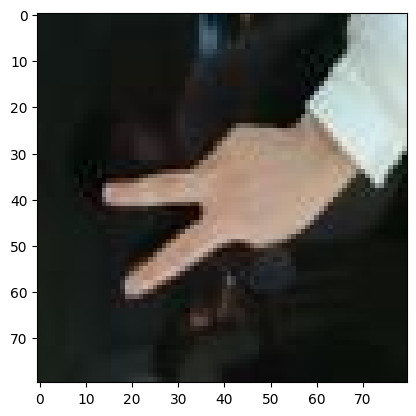

In [127]:
idx = 128   #1번째 x_test를 살펴보자. 
print("model.predict() 결과 :", predicted_result[idx])
print("model이 추론한 가장 가능성이 높은 결과 :", predicted_labels[idx])
print("실제 데이터의 라벨 :", y_test[idx])

# plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.imshow(x_test[idx])
plt.show()

model.predict() 결과 : [0.117 0.001 0.883]
model이 추론한 가장 가능성이 높은 결과 : 2
실제 데이터의 라벨 : 1


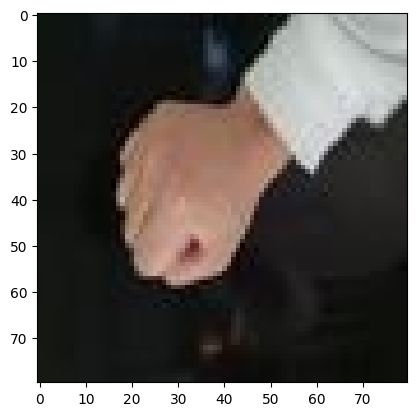

In [128]:
idx = 256   #1번째 x_test를 살펴보자. 
print("model.predict() 결과 :", predicted_result[idx])
print("model이 추론한 가장 가능성이 높은 결과 :", predicted_labels[idx])
print("실제 데이터의 라벨 :", y_test[idx])

# plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.imshow(x_test[idx])
plt.show()

model.predict() 결과 : [0.999 0.    0.001]
model이 추론한 가장 가능성이 높은 결과 : 0
실제 데이터의 라벨 : 2


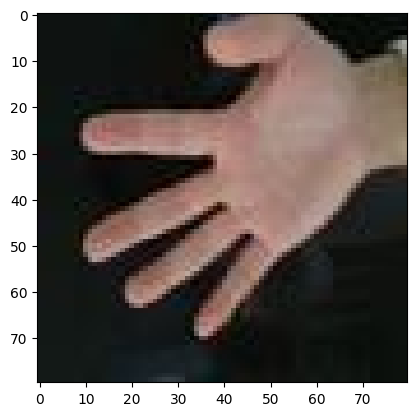

In [129]:
idx = 512   #1번째 x_test를 살펴보자. 
print("model.predict() 결과 :", predicted_result[idx])
print("model이 추론한 가장 가능성이 높은 결과 :", predicted_labels[idx])
print("실제 데이터의 라벨 :", y_test[idx])

# plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.imshow(x_test[idx])
plt.show()

idx = 512 네가, 『가위』라고 99.9％ 확률로 추론한 것은… 어딜 봐도 『보』 이다만？

#### 3개의 인덱스 번호를 느낌 오는대로 찍어서 시각화를 해보았다…<br>일단 여기서의 정확도는 0 이다. … 아니, 다 틀렸잖아？！ （내 운…）

#### 4-3. 모델의 추론 결과 시각화

model이 추론해 낸 숫자와 실제 라벨의 값이 다른 경우는 어떤 경우인지 직접 확인해보자.

하는 김에 predicted_result 에서 틀린 갯수를 집계하는 부분을 추가했다.

아까 평가에서의 약 56％ 정확도를 가져온 것 대비,

본데이터인 test 에서는 어느정도 정확도인지 확인을 못했다.

In [116]:
import random

test_count =  len(predicted_result)     ## test 전체 갯수
wrong_count = 0                         ## 틀린 갯수

wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i 번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)
        wrong_count = wrong_count + 1       ## 틀린 갯수 집계

print ("pred accuracy :", "%3.4f" % ((test_count - wrong_count) / test_count * 100.0))

pred accuracy :  56.3333


#### 혹시나 했지만 56.33％ 였다.

예측확률분포 :[0.665 0.    0.335]
라벨 :2, 예측결과 :0


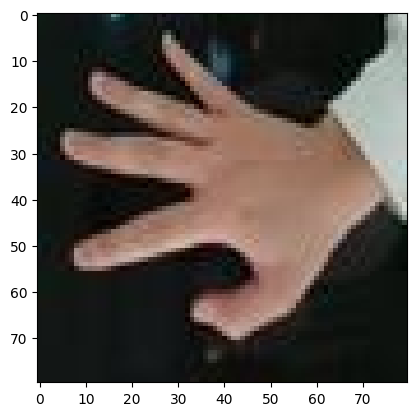

예측확률분포 :[0.929 0.    0.071]
라벨 :2, 예측결과 :0


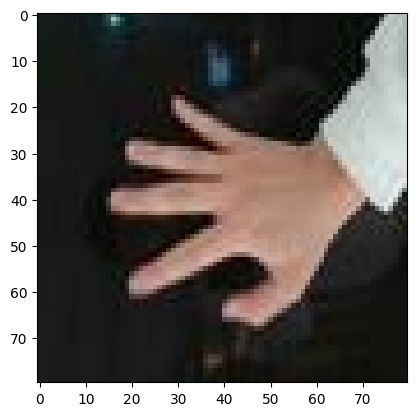

예측확률분포 :[0.328 0.    0.672]
라벨 :0, 예측결과 :2


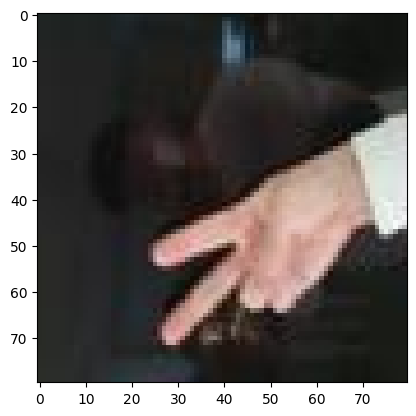

In [135]:
# wrong_predict_list 에서 랜덤하게 3개만 뽑아보자.
samples = random.choices(population=wrong_predict_list, k=3)

for n in samples:
    print("예측확률분포 :" + str(predicted_result[n]))
    print("라벨 :" + str(y_test[n]) + ", 예측결과 :" + str(predicted_labels[n]))
    # plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.imshow(x_test[n])
    plt.show()

### 5) 더 좋은 네트워크 만들기

훈련 과정에서는 어려울거 같지 않게 보이던 가위바위보 분류가

시험과정에서는 기대이하의 결과를 보여주었다.

천천히 노드의 전반적인 컨텐츠를 세 번 정도 읽고 코딩하면서 확인을 마쳤다.

그 와중에 놓치고 있던 루브릭 평가 기준,

학습 결과에 대한 그래프의 시각화와,

오버피팅을 극복하기 위한 여러가지 시도에 대한 평가 내용이 있었다.

그것들을 통해 다시 정리 한 내용은 다음과 같다.

 - 이 프로젝트를 진행하는 과정에서 오버피팅은 일반적으로 대부분 발생할 것이다.

 - 하지만 오버피팅이 왜 발생하고 어떻게 해결해야 하는지는 아직 잘 모르겠다.

 - 실망스러운 예측 결과에 멘탈이 흔들린 나머지, 시각화에 대한 내용을 잊어버리고 있었다.

프로젝트 과정에서 기본적으로 채워질 부분은 거의 다 채웠다.

여기서부터는 실질적으로 이 가위바위보 프로젝트가 60％ 이상의

정확도 달성을 목표로, 루브릭 기준 통과와 함께

여러가지 개선 방안들을 실험해 보는 내용이 될 것이다.

#### 5-1. 현 상황 분석 - 지금 네트워크에는 무슨 문제가 있을까

학습과정에서는 epoch 2회 만에 정확도 1.000 （100％）도 달성했던 모델이,

어째서 실제 데이터는 60％도 안되는 정확도를 보이는 것일까？

물론 실제로 60％ 를 달성한다 하더라도 가위바위보를 진행 하는것은 무리다.

66.667％ 정확도를 가져간다 하더라도 3번에 한번꼴은 상대가 무얼 냈는지

판단을 못하는 상대와 무슨 가위바위보를 하겠느냐만…

어찌됐든 지금 상황은 과적합이 의심스러운 상황이다.

Keras 에서는 학습 과정에서 과적합이 일어나는 상황을 확인할 수 있도록

fit 함수의 return 값으로 history 객체를 반환하게 되는데,

history 객체의 history 속성은, 연속적인 epoch 과정 에서의

train 손실／메트릭 값, validation 손실／메트릭 값 들을 기록하고 있다.

이러한 내용들은, Keras 공식 문서를 통해 확인 가능하다.

이를 활용하여 훈련이 잘 이루어졌는지, loss 는 어땠는지 한번 확인해 보자.

테스트를 위해 새로이 모델 설계와 컴파일, 훈련을 다시 해보겠다.

복잡도는 더 낮추고, 대신에 epoch 를 늘리도록 하겠다.

epoch 를 늘리면 history 에 기록되는 내용이 아무래도 더 많아질 것이다.

이하의 코드는 이전대비 아래와 같은 변경점을 가진다.

1. 우선 학습 반복 횟수를 20회로 늘려놓았다.<br>
손실함수의 경우는 이전과 같은 함수라서 기능상으로는 동일할 것으로 보인다. <br>
클래스 이름을 통한 접근에서 직접 클래스를 지정하는 방법으로 변경 한 셈이다.<br>

2. 모델 훈련 부분에서는 우선, 이전에 반환값을 저장하지 않았던 반면에<br>
이번에는 hresult 라는 변수에 history 객체를 담았다.<br>

3. 그리고 validation 기록을 위해 validation_split 매개변수를 활용하였다.<br>
validation_split 은 기본적으로 validation_split=0.0 설정되어 있는데,<br>
여기서는 validation_split=0.2 를 지정할 것이다.<br>
학습에 사용한 데이터의 20％ 는 유효성 검사에 사용하겠다는 뜻이다.<br>
그리고 여기서 사용하지는 않겠지만, vlidation_data 지정을 사용하면<br>
별도의 유효성 검사를 위한 데이터를 지정할 수 있다.<br>

In [154]:
n_channel_1=32     ## 얼마나 다양한 이미지의 특징을 살펴볼 것인가？ 먼저 몇개의 특징？
n_channel_2=32     ## 얼마나 다양한 이미지의 특징을 살펴볼 것인가？ 다음으로 몇개의 특징？
n_dense=32          ## 분류기 알고리즘을 얼마나 복잡하게 할 것인가？（뉴런 수）
n_train_epoch=10     ## 학습 반복 횟수

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation="relu", input_shape=(80,80,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation="relu"))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation="relu"))
model.add(keras.layers.Dense(3, activation="softmax"))

print("Model에 추가된 Layer 개수: ", len(model.layers))

model.summary()     ## 모델 정보를 요약해서 보여준다.

## 모델의 컴파일
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),   ## 손실함수
    optimizer="adam",                           ## 옵티마이저
    metrics=["accuracy"])                       ## 메트릭스

## 모델 훈련
hresult = model.fit(x_train, y_train, validation_split=0.2, epochs=n_train_epoch, batch_size=64)

Model에 추가된 Layer 개수:  7
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 78, 78, 32)        896       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 39, 39, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 37, 37, 32)        9248      
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 18, 18, 32)       0         
 g2D)                                                            
                                                                 
 flatten_14 (Flatten)        (None, 10368)             0         
                                                                 
 dense_28 (Dense)            

자 그러면 history 를 확인해 보자. hresult 라는 변수에 기록이 들어가 있다.

In [155]:
print(type(hresult))        ## <class 'keras.callbacks.History'>

## history 객체의 history 딕셔너리에, 원하는 정보가 들어있다.
print(type(hresult.history))    ## <class 'dict'>

## history 가 담고 있는 데이터를 출력
print(hresult.history)          ## loss, accuracy, val_loss, val_accuracy 값이 들어있다.


<class 'keras.callbacks.History'>
<class 'dict'>
{'loss': [12.745614051818848, 0.061255015432834625, 0.002188038546591997, 0.00016725521709304303, 6.318809755612165e-05, 4.4768486986868083e-05, 3.63406325050164e-05, 2.8816515623475425e-05, 2.2370195438270457e-05, 1.7662892787484452e-05], 'accuracy': [0.6080586314201355, 0.9846153855323792, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'val_loss': [5.635072231292725, 7.479869842529297, 6.2510857582092285, 7.689410209655762, 8.008356094360352, 8.36660385131836, 8.557075500488281, 8.654333114624023, 8.821747779846191, 8.983537673950195], 'val_accuracy': [0.07309941202402115, 0.34502923488616943, 0.3888888955116272, 0.3684210479259491, 0.37134504318237305, 0.3801169693470001, 0.3801169693470001, 0.37719297409057617, 0.37719297409057617, 0.37134504318237305]}


이 데이터들을 시각화 하면 아래와 같은 그래프로 표현할 수 있겠다.

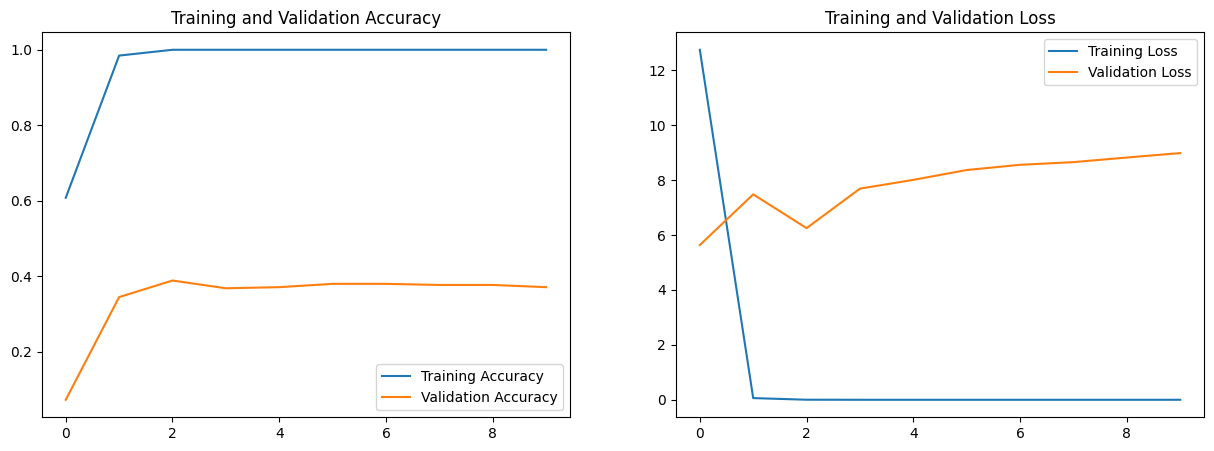

In [156]:
def result_plot(history):
    tacc = history.history['accuracy']
    vacc = history.history['val_accuracy']

    tloss=history.history['loss']
    vloss=history.history['val_loss']

    epochs_range = range(n_train_epoch)

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, tacc, label='Training Accuracy')
    plt.plot(epochs_range, vacc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, tloss, label='Training Loss')
    plt.plot(epochs_range, vloss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

result_plot(hresult)

이 그래프의 가로축(x축)은 epoch 단위를, 세로축(y축)은 정확도, 손실함수값을 나타낸다.

왼쪽의 그래프를 통해 확인 할 수 있는 사실은 다음과 같다.

- 파란색의 훈련 정확도가 거의 2번째 epoch 만에 1(100％)에 가까워 진 것을 확인 할 수 있다.

- 주황색의 검증 정확도의 경우는 0.4(40％) 미만에서 더이상의 진전을 보이지 않는다.

이러한 훈련-검증 정확도 관계에서 overfitting(과적합) 의 징후를 찾아볼 수 있다.

학습데이터에 모델이 과적합되는 현상은 모델의 성능을 떨어뜨리는 주요 이슈이다.

모델이 과적합되면 훈련 데이터에 대한 정확도는 높을지라도, 새로운 데이터

즉, 검증 데이터나 테스트 데이터에 대해서는 제대로 동작하지 않는다.

이는 모델이 학습 데이터를 불필요할 정도로 강하게 암기하여

훈련 데이터에 포함된 노이즈까지 학습한 상태라고 해석 할 수 있다.

#### 5-2. 과적합 문제 대응방법 - 데이터 증강

과대적합은 일반적으로 훈련 데이터가 적을 때 발생한다고 한다.

데이터 증강 기법은, 이 데이터의 양을 늘려서 과대적합을 피하는 방법이다.

이미지를 임의로 변환하는 방법을 사용하여,

기존 데이터에서 추가로 훈련 데이터를 생성하는 접근법을 통해,

모델이 데이터의 더 많은 특성을 파악하도록 하여 일반화에 도움을 준다.

데이터 증강 기법은 Keras 전처리 레이어를 통해 구현하게 되는데,

이 레이어를 다른 레이어들과 함께 모델에 포함시켜 사용한다.

마찬가지로 GPU 에서도 실행 된다고 한다.

- [Keras 전처리 레이어 (tf.keras.layers.experimental.preprocessing)](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/?version=nightly&hl=ko)

In [ ]:
image_shape = (80,80,3)

preproc = keras.layers.experimental.preprocessing

data_augmentation = keras.Sequential(
  [
    preproc.RandomFlip("horizontal", input_shape=image_shape),
    preproc.RandomRotation(0.1),
    preproc.RandomZoom(0.1),
    # keras.layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=image_shape),
    # keras.layers.experimental.preprocessing.RandomRotation(0.1),
    # keras.layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

이미지에 데이터 위와 같은 데이터 증강 기법을 적용한 결과를 시각화 해보자

<class 'numpy.int32'>
<class 'numpy.int32'>


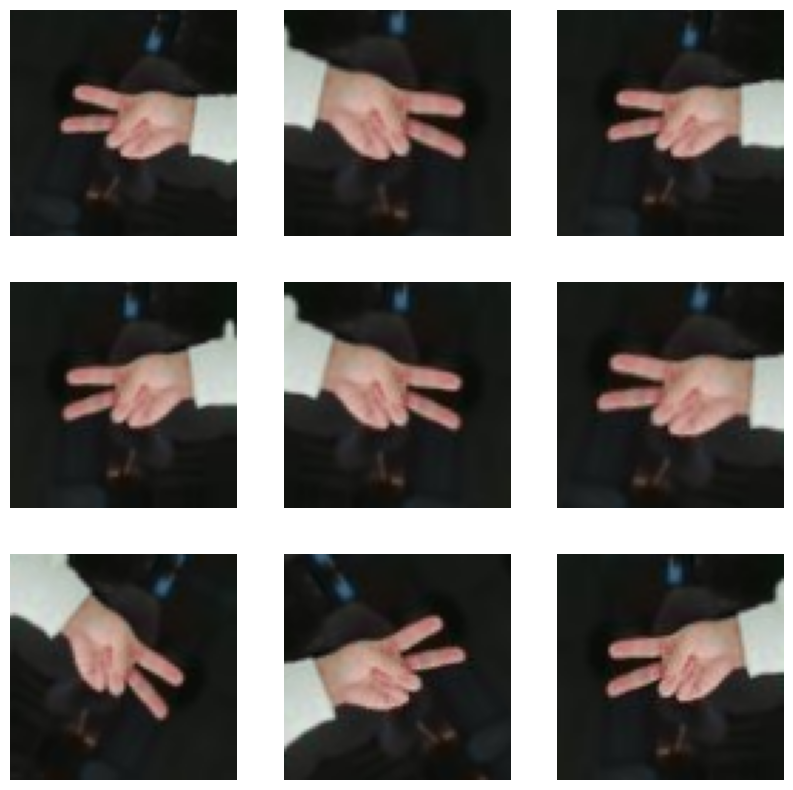

In [235]:
from silence_tensorflow import silence_tensorflow
silence_tensorflow()

# print(type(x_train[0][0][0][0]))
# print(type(x_train.take(1)))

plt.figure(figsize=(10, 10))

images = x_test
for i in range(9):
  augmented_images = data_augmentation(images)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_images[0].numpy().astype("uint8"))
  plt.axis("off")

# for images, _ in x_train_re.take(1):
#   for i in range(9):
#     augmented_images = data_augmentation(images)
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(augmented_images[0].numpy().astype("uint8"))
#     plt.axis("off")

이렇게 방향, 각도, Zoom 을 랜덤하게 바꾸어가며

데이터를 증식시키는 데이터 증강 기법을, 시각화를 통해 확인 해 보았다.

또한, 인공 신경망의 복잡도는 은닉층의 수나 매개변수의 수 등으로 결정되는데,

과적합 현상이 포착되었을 때, 모델에 대해서 할 수 있는 조치 중 하나는

인공 신경망의 복잡도를 줄이는 것이다.

데이터 증강과 함께, 과적합을 막기 위한 모델의 복잡도를 낮추는 방법도

바로 적용 하도록 하겠다.

추가로 구현한 데이터 증강 기법과 모델의 복잡도를 낮추어 모델에 적용하는 것은,

이전의 모델 설계 부분을 다음과 같이 바꾸어 볼 수 있다.

In [236]:
n_channel_1=32     ## 얼마나 다양한 이미지의 특징을 살펴볼 것인가？ 먼저 몇개의 특징？
n_channel_2=32     ## 얼마나 다양한 이미지의 특징을 살펴볼 것인가？ 다음으로 몇개의 특징？
n_dense=32          ## 분류기 알고리즘을 얼마나 복잡하게 할 것인가？（뉴런 수）
n_train_epoch=10     ## 학습 반복 횟수

model=keras.models.Sequential()
model.add(data_augmentation)        ## 데이터 증강
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation="relu", input_shape=(80,80,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation="relu"))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation="relu"))
model.add(keras.layers.Dense(3, activation="softmax"))

print("Model에 추가된 Layer 개수: ", len(model.layers))

model.summary()     ## 모델 정보를 요약해서 보여준다.

## 모델의 컴파일
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),   ## 손실함수
    optimizer="adam",                           ## 옵티마이저
    metrics=["accuracy"])                       ## 메트릭스

## 모델 훈련
hresult = model.fit(x_train, y_train, validation_split=0.2, epochs=n_train_epoch, batch_size=64)

Model에 추가된 Layer 개수:  8
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_17 (Sequential)  (None, 80, 80, 3)         0         
                                                                 
 conv2d_30 (Conv2D)          (None, 78, 78, 32)        896       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 39, 39, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 37, 37, 32)        9248      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 18, 18, 32)       0         
 g2D)                                                            
                                                                 
 flatten_15 (Flatten)        

아까의 그래프와 비교해 보자

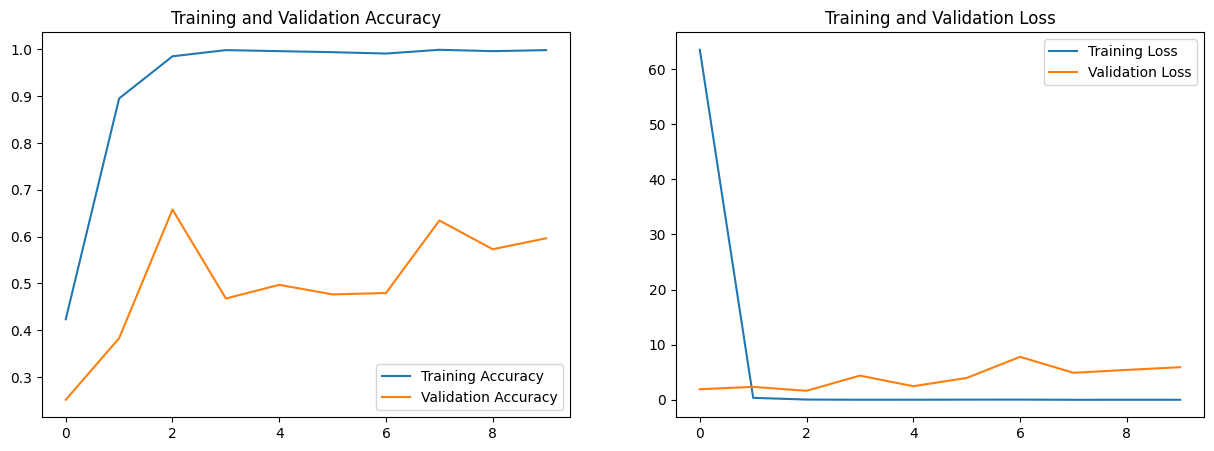

In [239]:
result_plot(hresult)

모델의 복잡도를 줄이는 것과, 데이터 증강 기법을 적용하기 전 상태의

이전의 그래프와 비교를 통해 확인 할 수 있는 사실은 다음과 같다.

- 전：파란색의 훈련 정확도가 거의 2번째 epoch 만에 1(100％)에 가까워 진 것을 확인 할 수 있다.<br>
후：훈련 정확도는 이전과 비슷하다.

- 전：주황색의 검증 정확도의 경우는 0.4(40％) 미만에서 더이상의 진전을 보이지 않는다.<br>
후：검증 정확도의 경우 대략 50％ 전후의 수치로 향상된 모습을 보였다.

#### 5-3. 과적합 문제 대응방법 - 가중치 규제(Regularization)

복잡한 모델이 간단한 모델보다 과적합될 가능성이 높다.

그리고 간단한 모델은 적은 수의 매개변수를 가진 모델을 말한다.

복잡한 모델을 좀 더 간단하게 하는 방법으로 가중치 규제(Regularization)가 있다.

대표적으로 L1, L2 규제가 있다. 이하에 참고자료를 통해 얻은 내용을 정리했다.

__L1 Regularization (Lasso)__<br>
- 가중치의 절댓값의 합을 더한 값에 규제 강도 λ를 곱하여 오차에 더한다.<br>
- 즉, 가중치(w)의 절댓값에 비례하는 손실(loss)이 기존 손실 함수에 추가되는 형태<br>
- 어떤 가중치(w)는 실제로 0이 된다. 즉, 모델에서 완전히 제외되는 특성이 생기는 것이다.<Br>
- 이를 통해 모델을 일반화시킨다. 다른 말로 Sparse Model을 만든다라고 한다.<br>
- tf.keras.layers.Dense(kernel_regularizer = tf.keras.regularizers.l1(ratio))<br>
  + ratio : 가중치에 L1 정규화를 적용하는 비율 (0.001 ~ 0.005)

__L2 Regularization (Ridge)__<br>
- 각 가중치 제곱의 합에 규제 강도 λ를 곱한다.<br>
- 즉, 가중치의 제곱에 비례하는 손실이 기존 손실 함수에 추가되는 형태<br>
- λ를 크게 하면 가중치가 더 많이 감소되고, λ를 작게 하면 가중치가 증가한다.<br>
- 학습이 진행될 때 가중치의 값이 0 에 가까워지도록 만들어준다. 가중치를 0 으로 만드는 L1 과는 차이가 있다.<br>
- 이를 통해 특정 가중치에 치중되지 않도록 가중치 값을 조율하게 되며 가중치 감쇠(Weight Decay)라고도 부른다.<br>
- tf.keras.layers.Dense(kernel_regularizer = tf.keras.regularizers.l2(ratio))<br>
  + ratio : 가중치에 L2 정규화를 적용하는 비율 (0.001 ~ 0.005)

여기에서 알아두어야 할 사실은, L2 규제는 가중치 파라미터를 제한하지만

L1 규제와 달리 완전히 0으로 만들지는 않는다는 점이다.

이것이 L2 규제를 더 많이 사용하는 이유 중 하나이다.

그렇다면 이제 가중치 규제 객체를 층의 키워드 매개변수에 전달하여,

가중치에 규제를 추가해 보자.

바로 전에 사용했던 모델 설계 부분을 다시 가져와서 L2 가중치 규제를 적용했다.

In [240]:
n_channel_1=32     ## 얼마나 다양한 이미지의 특징을 살펴볼 것인가？ 먼저 몇개의 특징？
n_channel_2=32     ## 얼마나 다양한 이미지의 특징을 살펴볼 것인가？ 다음으로 몇개의 특징？
n_dense=32          ## 분류기 알고리즘을 얼마나 복잡하게 할 것인가？（뉴런 수）
n_train_epoch=10     ## 학습 반복 횟수

model=keras.models.Sequential()
model.add(data_augmentation)        ## 데이터 증강
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation="relu", input_shape=(80,80,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation="relu"))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(
    n_dense, kernel_regularizer=keras.regularizers.l2(0.001), activation="relu"))  ## L2 가중치 규제
    ## l2(0.001)는 네트워크의 전체 손실에 층에 있는 가중치 행렬의 모든 값이
    ## 0.001 * weight_coefficient_value**2만큼 더해진다는 의미
    ## 이런 페널티(penalty)는 훈련할 때만 추가되므로
    ## 테스트 단계보다 훈련 단계에서 네트워크 손실이 훨씬 더 클 것

model.add(keras.layers.Dense(3, activation="softmax"))

print("Model에 추가된 Layer 개수: ", len(model.layers))

model.summary()     ## 모델 정보를 요약해서 보여준다.

## 모델의 컴파일
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),   ## 손실함수
    optimizer="adam",                           ## 옵티마이저
    metrics=["accuracy"])                       ## 메트릭스

## 모델 훈련
hresult = model.fit(x_train, y_train, validation_split=0.2, epochs=n_train_epoch, batch_size=64)

Model에 추가된 Layer 개수:  8
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_17 (Sequential)  (None, 80, 80, 3)         0         
                                                                 
 conv2d_32 (Conv2D)          (None, 78, 78, 32)        896       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 39, 39, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 37, 37, 32)        9248      
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 18, 18, 32)       0         
 g2D)                                                            
                                                                 
 flatten_16 (Flatten)        


그럼 L2 가중치 규제를 적용한 결과를 확인해 보자.

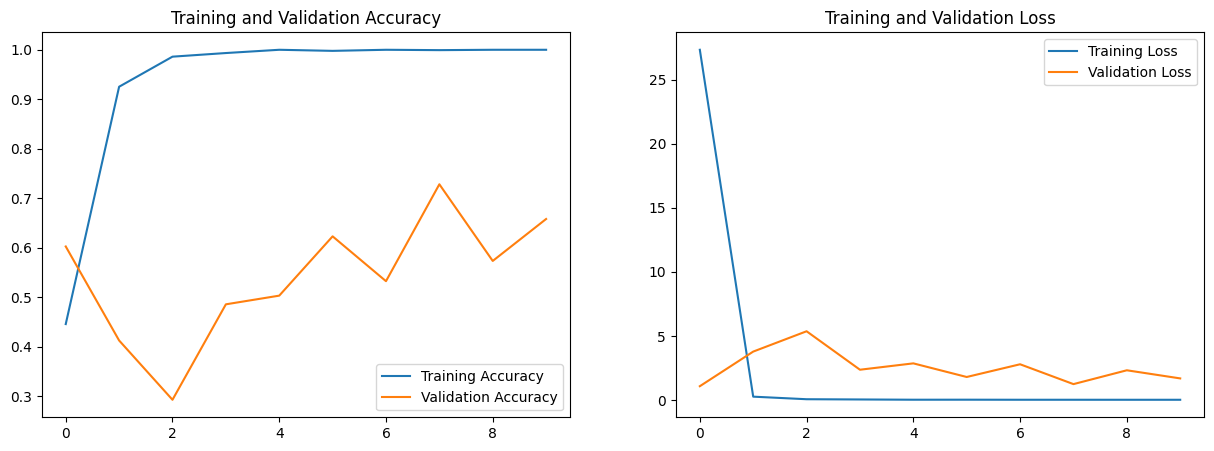

In [241]:
result_plot(hresult)

L2 가중치 규제를 적용하기 전 상태의

이전의 그래프와 비교를 통해 확인 할 수 있는 사실은 다음과 같다.

- 파란색의 훈련 정확도는 이전과 비슷하다.

- 주황색의 검증 정확도의 경우 이전에 대략 50％ 내외 였으나,<br>
L2 가중치 규제 적용 후, epoch 6~10 구간에서는 대략 정확도 60％ 전후의 결과를 보였다.

이렇게 루브릭 목표를 달성할 수 있음을 확인 했다.

그렇지만, 신경망에서 과대적합을 방지하기 위해 가장 널리 사용하는 방법으로

아래와 같은 것들이 있는데, 아직 사용하지 않은 몇가지 방법이 더 있다.

- 네트워크의 용량을 줄인다 〔적용〕
- 데이터 증식(data-augmentation) 〔적용〕
- 가중치 규제를 추가 〔적용〕
- 드롭아웃 추가
- 배치 정규화(batch normalization)
- 더 많은 훈련 데이터를 모은다. 〔전처리 시간이 많이 필요하니, 필요하다면 하겠지만 지금은 아니다.〕

지금까지의 과정을 보았을때, 남은 두가지 방법을 다 적용하면

이거 계속 10％ 내외로 정확도가 올라갔으니, 최종적으로 80％ 할 수 있는거 아닐까？

계속해서 챌린지 해 보도록 하겠다.

#### 5-4. 과적합 문제 대응방법 - 드롭아웃 (Dropout)

과적합을 줄이는 또 다른 기법은 Regularization 의 한 형태인 드롭아웃을 네트워크에 도입하는 것이다.

드롭아웃(dropout)은 신경망에서 가장 효과적이고 널리 사용하는 규제 기법 중 하나로,

드롭아웃을 층에 적용하면 훈련하는 동안 층의 출력 특성을 랜덤하게 끈다(즉, 0 으로 만든다).

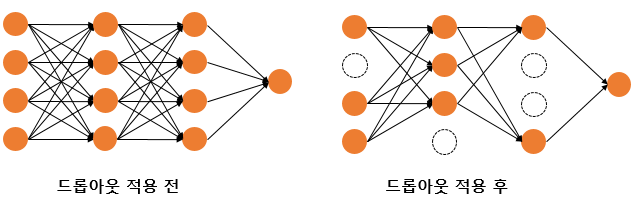

이 그림은 드롭아웃 전과 후의 신경망을 비교하고 있다.

예를 들어 드롭아웃의 비율을 0.5로 한다면

학습 과정마다 랜덤으로 절반의 뉴런을 사용하지 않고, 절반의 뉴런만을 사용하게 된다.

학습 시에 인공 신경망이 특정 뉴런 또는 특정 조합에 너무 의존적이게 되는 것을 방지해주고,

매번 랜덤 선택으로 뉴런들을 사용하지 않으므로,

서로 다른 신경망들을 앙상블하여 사용하는 것과 같은 효과를 내어 과적합을 방지하게 되는 것이다.

일반적으로 드롭아웃은 신경망 학습 시에만 사용하고, 예측 시에는 사용하지 않는다.

다만, 케라스에서는 이러한 부분을 이미 고려하였다.

Keras 에서 Dropout 층은, 테스트 단계에서는 어떤 노드도 드롭아웃하지 않는데, 

훈련 단계보다 더 많은 노드가 활성화되기 때문에

균형을 맞추기 위해 층의 출력 값을 드롭아웃 비율만큼 줄인다고 한다.

데이터 증강, L2 가중치 규제와 마찬가지로 드롭아웃 규제도 

훈련시에는 적용이 되지만, 추론시에는 비활성화 되므로 그냥 사용하면 된다.

아래와 같이 Dropout을 기존 모델에 추가했다.

In [247]:
n_channel_1=32     ## 얼마나 다양한 이미지의 특징을 살펴볼 것인가？ 먼저 몇개의 특징？
n_channel_2=32     ## 얼마나 다양한 이미지의 특징을 살펴볼 것인가？ 다음으로 몇개의 특징？
n_dense=32          ## 분류기 알고리즘을 얼마나 복잡하게 할 것인가？（뉴런 수）
n_train_epoch=10     ## 학습 반복 횟수

model=keras.models.Sequential()
model.add(data_augmentation)        ## 데이터 증강
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation="relu", input_shape=(80,80,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Dropout(0.1))        ## Dropout 규제
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation="relu"))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.1))        ## Dropout 규제
model.add(keras.layers.Dense(
    n_dense, kernel_regularizer=keras.regularizers.l2(0.001), activation="relu"))  ## L2 가중치 규제
    ## l2(0.001)는 네트워크의 전체 손실에 층에 있는 가중치 행렬의 모든 값이
    ## 0.001 * weight_coefficient_value**2만큼 더해진다는 의미
    ## 이런 페널티(penalty)는 훈련할 때만 추가되므로
    ## 테스트 단계보다 훈련 단계에서 네트워크 손실이 훨씬 더 클 것

model.add(keras.layers.Dropout(0.1))        ## Dropout 규제
model.add(keras.layers.Dense(3, activation="softmax"))

print("Model에 추가된 Layer 개수: ", len(model.layers))

model.summary()     ## 모델 정보를 요약해서 보여준다.

## 모델의 컴파일
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),   ## 손실함수
    optimizer="adam",                           ## 옵티마이저
    metrics=["accuracy"])                       ## 메트릭스

## 모델 훈련
hresult = model.fit(x_train, y_train, validation_split=0.2, epochs=n_train_epoch, batch_size=64)

Model에 추가된 Layer 개수:  11
Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_17 (Sequential)  (None, 80, 80, 3)         0         
                                                                 
 conv2d_44 (Conv2D)          (None, 78, 78, 32)        896       
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 39, 39, 32)       0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 39, 39, 32)        0         
                                                                 
 conv2d_45 (Conv2D)          (None, 37, 37, 32)        9248      
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 18, 18, 32)       0         
 g2D)                       

Dropout 을 세번에 걸쳐 층 사이사이에 추가해 놓은 결과를 확인해 보자.

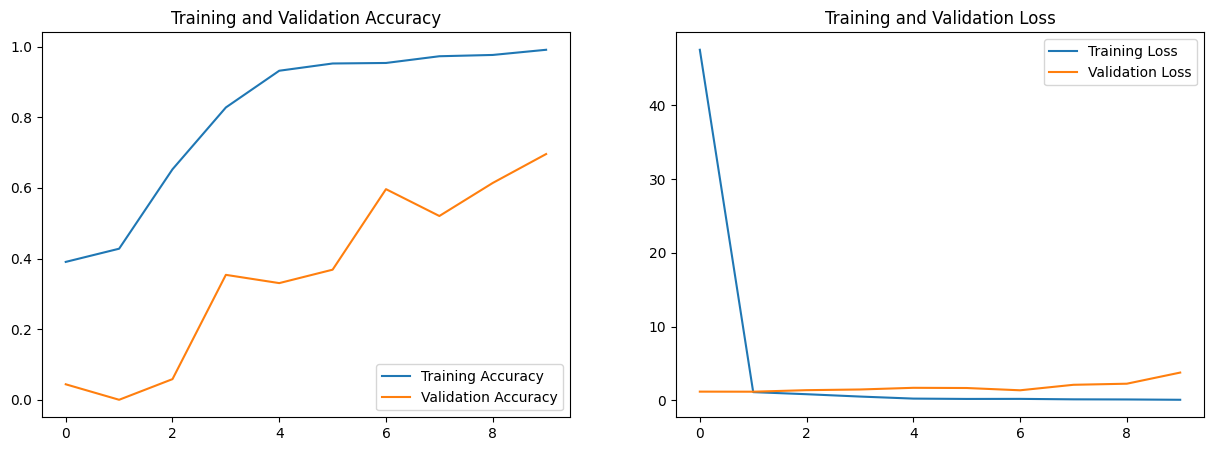

In [248]:
result_plot(hresult)

드롭아웃 규제를 적용하기 전 상태의 이전의 그래프와

지금의 그래프 비교를 통해 확인 할 수 있는 사실은 다음과 같다.

- 파란색의 훈련 정확도는 드롭아웃 영향을 받아서, 기존 그래프와 다르게 상승 곡선이 보인다.<br>
후반부에 들어서서는 기존 모델의 결과와 거의 비슷해져간다.

- 주황색의 검증 정확도의 경우 이전에 대략 60％ 내외 였으나,<br>
드롭아웃 적용 후, 대략 적으로 우상향하는 모습을 볼 수 있다.<br>
마지막에는 69.59％ 의 정확도를 보였는데,<br>
더 반복하면 조금 더 높일 수 있을 것 같다는 생각이 든다.

#### 5-5. 과적합 문제 대응방법 - 배치 정규화(Batch Normalization)

일반 정규화(Normalization)은 입력 데이터를 정규화하는 것이었다.

배치 정규화는 활성화 함수의 출력값(활성화값)을 정규화하는 작업을 뜻한다. (평균 0, 표준편차 1의 분포로 변경)

배치 정규화의 장점은 다음과 같다. 

- 학습을 빨리 진행할 수 있다. (학습 속도 개선)

- 가중치 초깃값에 크게 의존하지 않는다.

- 오버피팅을 억제한다.

그러고보니, 이러한 장점들 때문에 가중치 규제, 드롭아웃 등을

사용하지 않더라도 배치 정규화를 통해 과적합을 억제할 수 있다고 한다.

잠깐, 나는 이게 과적합 해소에 제일 영향을 못 줄거 같은 느낌이라서

맨 나중에 해야지 하고 후순위로 미루어 두었는데, 이제와서 이게…？

아니… 대체… 이런 현실이 있단 말인가…？

이걸 진작에 해봤으면 빨리 끝나고 좋았었잖아… 에라이

아무튼, 배치 정규화도 Layer 로, 

일반적으로 Dense Layer 와 활성화 함수 사이에 배치시킨다.

아래에는, 처음의 모델에서 배치 정규화만 추가한 모델을 준비했다.

어디 얼마나 효과가 있을지 기대된다.

In [254]:
n_channel_1=32     ## 얼마나 다양한 이미지의 특징을 살펴볼 것인가？ 먼저 몇개의 특징？
n_channel_2=32     ## 얼마나 다양한 이미지의 특징을 살펴볼 것인가？ 다음으로 몇개의 특징？
n_dense=32          ## 분류기 알고리즘을 얼마나 복잡하게 할 것인가？（뉴런 수）
n_train_epoch=10     ## 학습 반복 횟수

model=keras.models.Sequential()
model.add(data_augmentation)        ## 데이터 증강
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation="relu", input_shape=(80,80,3)))
model.add(keras.layers.MaxPool2D(2,2))
# model.add(keras.layers.Dropout(0.1))        ## Dropout 규제
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation="relu"))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
# model.add(keras.layers.Dropout(0.1))        ## Dropout 규제
# model.add(keras.layers.Dense(
#     n_dense, kernel_regularizer=keras.regularizers.l2(0.001), activation="relu"))  ## L2 가중치 규제
    ## l2(0.001)는 네트워크의 전체 손실에 층에 있는 가중치 행렬의 모든 값이
    ## 0.001 * weight_coefficient_value**2만큼 더해진다는 의미
    ## 이런 페널티(penalty)는 훈련할 때만 추가되므로
    ## 테스트 단계보다 훈련 단계에서 네트워크 손실이 훨씬 더 클 것

model.add(keras.layers.BatchNormalization())    ## 배치 정규화（Batch Normalization）
# model.add(keras.layers.Dropout(0.1))        ## Dropout 규제
model.add(keras.layers.Dense(3, activation="softmax"))

print("Model에 추가된 Layer 개수: ", len(model.layers))

model.summary()     ## 모델 정보를 요약해서 보여준다.

## 모델의 컴파일
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),   ## 손실함수
    optimizer="adam",                           ## 옵티마이저
    metrics=["accuracy"])                       ## 메트릭스

## 모델 훈련
hresult = model.fit(x_train, y_train, validation_split=0.2, epochs=n_train_epoch, batch_size=64)

Model에 추가된 Layer 개수:  8
Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_17 (Sequential)  (None, 80, 80, 3)         0         
                                                                 
 conv2d_56 (Conv2D)          (None, 78, 78, 32)        896       
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 39, 39, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_57 (Conv2D)          (None, 37, 37, 32)        9248      
                                                                 
 max_pooling2d_57 (MaxPoolin  (None, 18, 18, 32)       0         
 g2D)                                                            
                                                                 
 flatten_28 (Flatten)        

너무 의심스러운데 … 정말 이상한데 … 그래프를 한번 보자

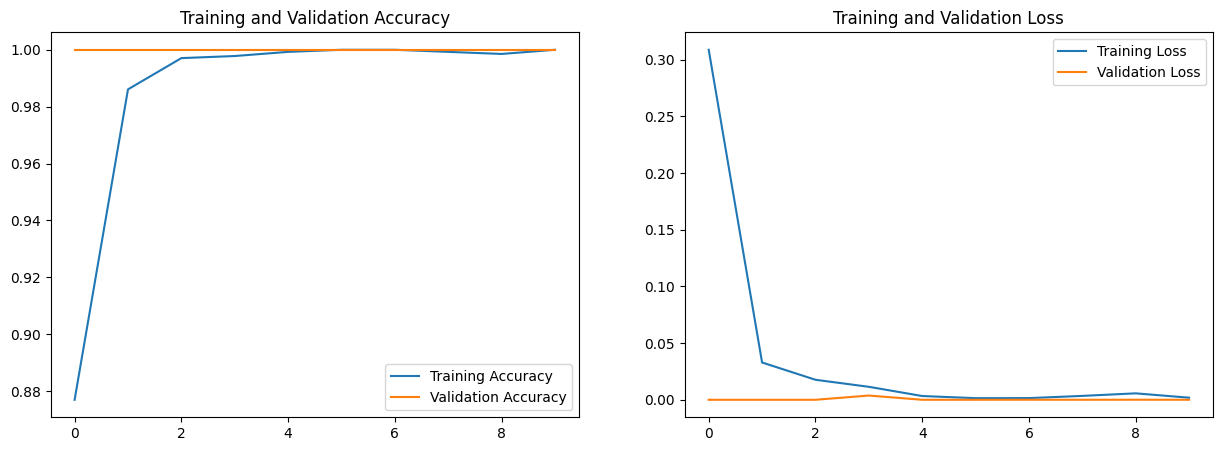

In [255]:
result_plot(hresult)

아니 이게 된다고…？ 과적합이겠지 설마

자… evaluate 들어갑니다？

In [256]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

19/19 - 0s - loss: 21.7415 - accuracy: 0.4450 - 414ms/epoch - 22ms/step
test_loss: 21.741519927978516
test_accuracy: 0.4449999928474426


안되겠네 이건. 이 실험의 결과로 확인 할 수 있는 사실 하나,

배치 정규화 하나로 다 된다는 그런 환상은 접어두는게 좋을 것 같다.

#### 5-6. 지금까지의 기법들의 조합과 하이퍼파라메터 튜닝 - 최종평가

이정도 도전을 해 봤으면, 많이 시도 해 봤다고 생각하지만,

마지막으로 딥러닝 네트워크의 구조를 거의 바꾸지 않으면서 해볼 수 있는 것이 남아있다.

딥러닝 네트워크 설계하는 과정에서 살펴본, 하이퍼파라미터들을 바꾸어 보는 것이다.

Conv2D 레이어에서 입력 이미지의 특징 수를 늘리거나 줄인 다거나,

Dense 레이어에서 뉴런수를 바꾸어 본다거나, 

학습 반복 횟수인 epoch 값을 변경해 볼 수 있을 것이다.

여기서 그러한 과정과 전반적인 튜닝을 통하여,

마지막 모델의 최종적인 분류 결과 까지 평가해 보고자 한다.

이전에 과적합에 대한 내용들을 정리했었다. 업데이트 하면 아래와 같다.

- 네트워크의 용량을 줄인다 〔적용〕
- 데이터 증식(data-augmentation) 〔적용〕
- 가중치 규제를 추가 〔적용〕
- 드롭아웃 추가 〔적용〕
- 배치 정규화(batch normalization) 〔사용 해 봤으나 효과가 좋지 못하여 여기에 적용은 하지 않겠다.〕
- 더 많은 훈련 데이터를 모은다. 〔전처리 시간이 많이 필요하니, 필요하다면 할 예정이다.〕

아래의 모델은, 지금까지의 모델에서 어느정도 적합하다고 생각하는 요소들을 정리하고

약간의 조정들을 통해 먼저 적당한 훈련 결과 까지 도달해 보고자 준비했다.

In [283]:
n_channel_1=32     ## 얼마나 다양한 이미지의 특징을 살펴볼 것인가？ 먼저 몇개의 특징？
n_channel_2=64     ## 얼마나 다양한 이미지의 특징을 살펴볼 것인가？ 다음으로 몇개의 특징？
n_dense=64          ## 분류기 알고리즘을 얼마나 복잡하게 할 것인가？（뉴런 수）
n_train_epoch=8     ## 학습 반복 횟수

model=keras.models.Sequential()
model.add(data_augmentation)        ## 데이터 증강
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation="relu", input_shape=(80,80,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Dropout(0.1))        ## Dropout 규제
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation="relu"))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.1))        ## Dropout 규제

model.add(keras.layers.Dense(
    n_dense, kernel_regularizer=keras.regularizers.l2(0.001), activation="relu"))  ## L2 가중치 규제
    ## l2(0.001)는 네트워크의 전체 손실에 층에 있는 가중치 행렬의 모든 값이
    ## 0.001 * weight_coefficient_value**2만큼 더해진다는 의미
    ## 이런 페널티(penalty)는 훈련할 때만 추가되므로
    ## 테스트 단계보다 훈련 단계에서 네트워크 손실이 훨씬 더 클 것

model.add(keras.layers.Dropout(0.1))        ## Dropout 규제
# model.add(keras.layers.BatchNormalization())    ## 배치 정규화（Batch Normalization）
model.add(keras.layers.Dense(3, activation="softmax"))

print("Model에 추가된 Layer 개수: ", len(model.layers))

model.summary()     ## 모델 정보를 요약해서 보여준다.

## 모델의 컴파일
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),   ## 손실함수
    optimizer="adam",                           ## 옵티마이저
    metrics=["accuracy"])                       ## 메트릭스

## 모델 훈련
hresult = model.fit(x_train, y_train, validation_split=0.2, epochs=n_train_epoch, batch_size=64)

Model에 추가된 Layer 개수:  11
Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_17 (Sequential)  (None, 80, 80, 3)         0         
                                                                 
 conv2d_90 (Conv2D)          (None, 78, 78, 32)        896       
                                                                 
 max_pooling2d_90 (MaxPoolin  (None, 39, 39, 32)       0         
 g2D)                                                            
                                                                 
 dropout_48 (Dropout)        (None, 39, 39, 32)        0         
                                                                 
 conv2d_91 (Conv2D)          (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_91 (MaxPoolin  (None, 18, 18, 64)       0         
 g2D)                       

학습결과와 상관 없이 evaluate 평가 결과를 계속 확인하겠다.

In [284]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

19/19 - 1s - loss: 3.3787 - accuracy: 0.7233 - 534ms/epoch - 28ms/step
test_loss: 3.3786885738372803
test_accuracy: 0.7233333587646484


이 모델에서 정확도가 72％ 나왔다.

분류 예측과 그 결과를 실제로 확인 해 보자.

In [285]:
# model이 추론한 확률값.
predicted_result = model.predict(x_test)

predicted_labels = np.argmax(predicted_result, axis=1)

## 소수점을 그나마 보기 편하게 바꿔줬다. Numpy 만세！
predicted_result = np.around(predicted_result, 3)

19/19 [==============================] - 1s 30ms/step


결과 수치를 확인 해 보고 틀린 분류들을 모아보자.

In [286]:
test_count =  len(predicted_result)     ## test 전체 갯수
wrong_count = 0                         ## 틀린 갯수

wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i 번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)
        wrong_count = wrong_count + 1       ## 틀린 갯수 집계

print ("pred accuracy :", "%3.4f" % ((test_count - wrong_count) / test_count * 100.0))

pred accuracy : 72.3333


예전에 정확도 56％ 였을 때와, 틀린 분류들의 근황이 어떤지 궁금하니 한번 알아보도록 하자.

별 다른 이유는 없고, 이전에 너무 어이가 없었던 경우가 많아서, 지금은 좀 나아졌는지 궁금해서다.

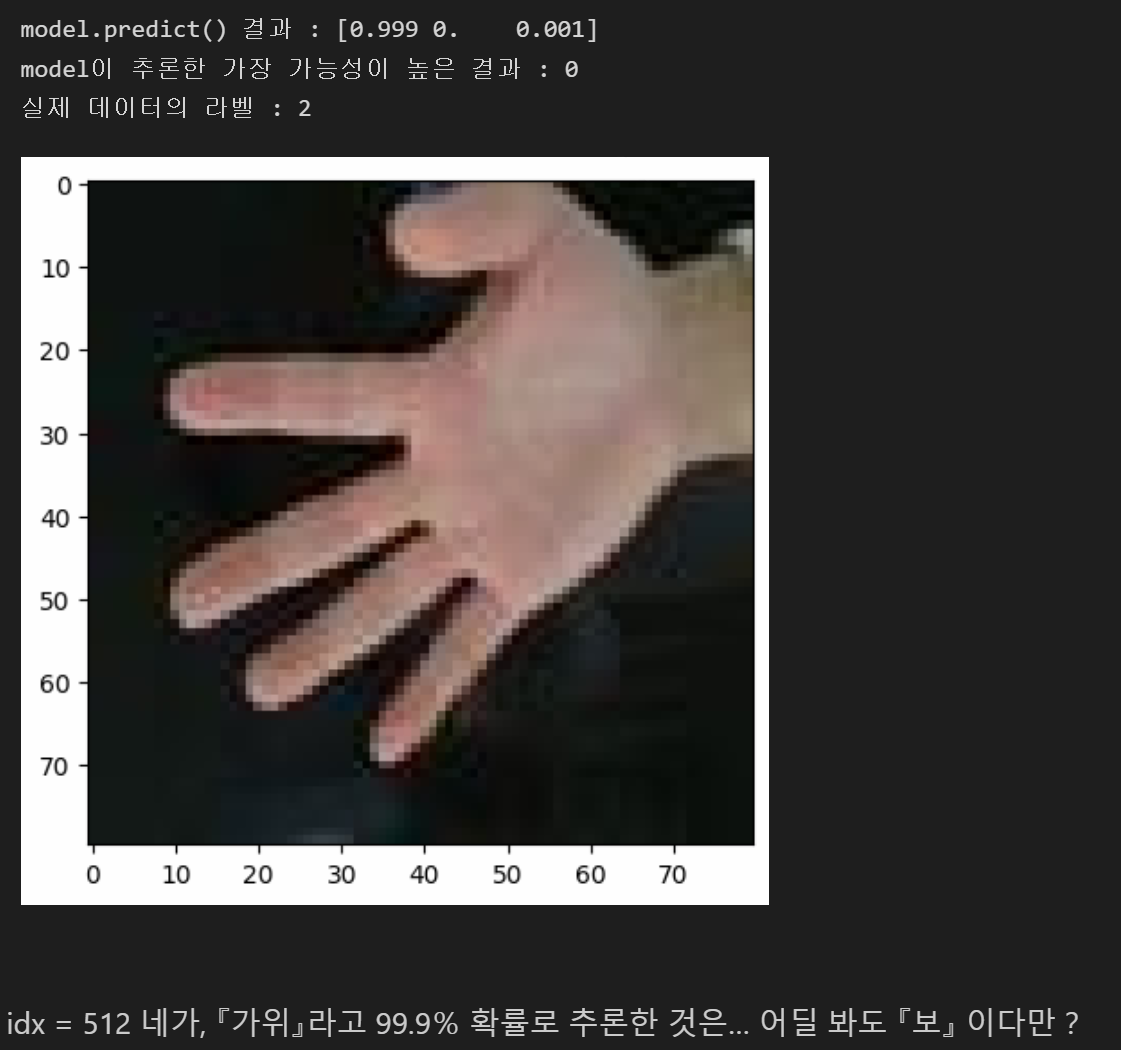

예측확률분포 :[0.    0.168 0.832]
라벨 :1, 예측결과 :2


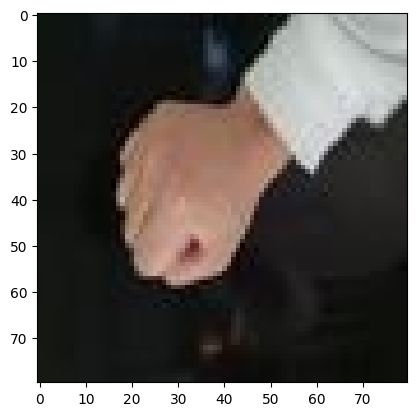

예측확률분포 :[1. 0. 0.]
라벨 :2, 예측결과 :0


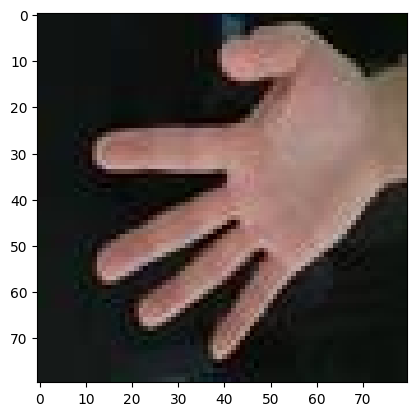

예측확률분포 :[0. 0. 1.]
라벨 :0, 예측결과 :2


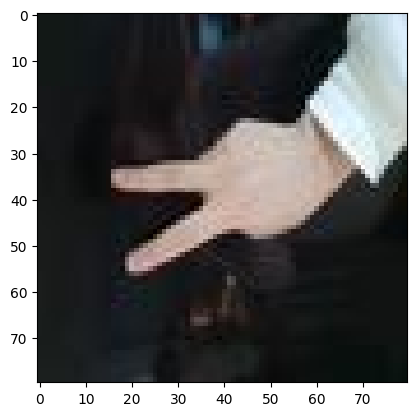

In [295]:
# wrong_predict_list 에서 랜덤하게 3개만 뽑아보자.
samples = random.choices(population=wrong_predict_list, k=3)

for n in samples:
    print("예측확률분포 :" + str(predicted_result[n]))
    print("라벨 :" + str(y_test[n]) + ", 예측결과 :" + str(predicted_labels[n]))
    # plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.imshow(x_test[n])
    plt.show()

여전하구나 넌…

…그만 알아보자.

<hr>

### ■ 프로젝트 회고

#### 1) 이번 프로젝트에서 '어려웠던 점'

샘플 가위바위보 사진을 만드는 것 부터 신경써서 한다고 했는데,

막상 사진의 퀄리티가 맘에 안들어서 새로 촬영을 했다.

아마 나 말고도 대부분 사진을 최소 두번 이상은 갈아 엎었을 것 같다.

사진 이미지를 해결하니, 곧바로 개인 IDE 에서 TF 설치에 문제가 발생한다.

어떻게든 넘어가니 프로젝트 진행 과정속에 하나 둘 씩 나타나는 문제들…

해결방법에 대한 힌트가 프로젝트 노드안에 자리잡고 있었지만,

그것들을 찾아 적용하는 것도 쉽지 않은 일이었다.

가장 답답한 점은 test 셋 분류 정확도 60％ 달성이 만만치 않다는 것이다.

중간중간 확인하기도 쉽지 않고,

결과적으로 train 단계에서의 valid_accuracy 로는 짐작을 할 수가 없다.

그냥 어렴풋이 과적합이 발생하지 않은 것 같다ㅡ 싶으면 evaluate 해봐야 한다.

모델을 계속 재설계 하고 학습을 돌리는데 시간이 많이 소요된다.

물론 데이터셋이야 잘 분류를 해 두어서 데이터 전처리는 안하도록 구성을 했지만

사진 이미지 갈아 엎는 과정에서, 데이터 전처리 새로 해야 하는데 20분 내외의 시간이 걸렸다.

이게 마무리까지 잘 될까 진행하는 내내 불안했는데,

매우 다행스럽게도 제출 기한에 맞추긴 했다지만,

쉽지 않은 과정이어서 포기할까도 생각했었다.

#### 2) 프로젝트를 진행하면서 본인이 '학습한 내용'

LMS 학습 과정에서 tf.keras 와 샘플 모델의 실습을 통해

전반적인 딥러닝의 과정을 경험해 보았다.

데이터 준비부터 시작해서, 딥러닝 네트워크 설계, 학습과 검증방법,

과적합 문제에 대한 대응 방법…

그 과정에서 처음 보는 것들이나 몰랐던 개념들이 있으면 찾아보고

학습한 내용을 정리하여, 여기에 대부분 그 기록들을 남겨놓았다.

무엇보다 과적합 이슈 부분을 많은 분량을 써서 기록에 담았다.

지금까지 머신러닝 하는 과정에서, 나는 이렇다할만한

과적합을 겪어본 경험이 없어서 과적합이란 그냥 너무

(정확도를 높이려고) 열심히 하려고 하다보면 발생하는 것이라고 생각했다.

그러나 딥러닝에 들어와서야 겪어본 과적합은,

통상적으로 발생하기 너무나 쉬운 환경이라고 생각했다.

물론 모델의 설계가 제일 중요하겠지만, 

과적합에 대한 대비를 학습하는 것은 상당히 의미있는 시간이었다.

#### 3) 프로젝트를 진행하면서 '알아낸 점' 혹은 '아직 모호한 점'

생각에 없던 것들인데, 프로젝트 하다보면서 알게 된 점이라면

노드의 학습을 방해하는게 결과적으로는 일반화를 추구한다는 점을 실제로 경험해 보면서

신경망을 구성하는 데에, 파라메터가 많고 복잡도가 높다고 해서

그것에 비례하여 좋은 결과가 나오는게 아니라는 것을 알 수 있었다.

모호한점은 크게 두가지로 볼 수 있다.

첫번째는, 모델 설계에 관한 부분이다.

은닉층에 레이어를 쌓고 그 안에서 어떤 일이 일어나는지 도무지 알 수가 없어서

여기에 이걸 올리면 어떻게 될 지？ 라는 것에 대해서 사실 감도 안온다.

이것저것 시도를 해 보면서, 추측으로 『이건 될 거 같은데？』 라며 모델 설계를 진행했다.

일반적으로 어떤 이유로, 어떤 층 앞에 쌓아둔다 라는 것들은 알겠다.

다만 결국, 그 층의 순서를 제외하고, 파라메터 값에 대해서는 어떤 영향을 주는지

실제로 알 수가 없었으니, 나에게는 조정해야 할 하이퍼파라메터가 늘어난 느낌이었다.

두번째는, 학습과정과 프로젝트 전반부에는 사용했었지만,

본 프로젝트 내용에서는 필요가 없다 생각하여 시험삼아 사용하지 않은 정규화에 관한 부분이다.

코드상으로는 

```python

    x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
    print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

```

부분인데, 시험삼아 사용하지 않았을 때와 사용 했을때의 차이를 파악할 수 없었다.

신경망에 들어가기엔 0~255의 값보다 0, 1 값이 더 적합하다고는 하는데

그 이상의 이유나 의미는 아직 찾을 수 없었다.

또한, 적용하지 않았을 때에 아무런 문제가 없었어서 결과적으로 적용을 하지 않았다.

마찬가지로 MNIST 부분에서도 이 부분이 필요한가 싶어서

적용하지 않고 진행을 했었는데 문제는 발견하지 못했었다.

적용 하는건 어렵지 않지만, 시험삼아 적용을 일부러 안하고 진행 해 봤어서

이게 정말 필요한 과정이고, 어떤 이점이 있는지를 더 모르겠는 상황이 됐다.

#### 4) 루브릭 평가 지표를 맞추기 위해 '시도한 것들'

여기의 대부분의 내용이 사실상 루브릭 평가 지표를 맞추기 위해 시도한 것들이다.

오버피팅을 제외하고는 학습 과정의 반복으로 루브릭 평가 지표는 달성이 된다.

다만 과적합 부분은 예외라서, 많은 시도가 필요했다.

정리하자면,

5-1 의 네트워크의 문제를 파악하기 위한 시각화와 과적합 발생의 확인

5-2 의 데이터 증강, 5-3 의 가중치 규제, 5-4 의 드롭아웃, 

5-5 의 배치 정규화, 5-6 의 하이퍼파라메터 튜닝

그리고 그것들을 위한 단계마다 부가적으로 수행한 검증 작업등이 있다.

#### 5) 만약에 '루브릭 평가 지표를 달성하지 못했을 때, 이유에 관한 추정'

평가지표를 모두 달성하는 과정에서 느낀 점이 있다.

분명하게, 『이거, 이러다가는 루브릭 안되겠는데？』 하고 느꼈던 때가 있다.

입력 데이터셋의 상태가 안좋으면 답이 안나온다.

- 『GIGO 란 말이 있죠…<br>
쓰레기를 넣어봐야, 쓰레기 뿐이 나오지 않는다는 뜻입니다.<br>
그런데…, 이 가위바위보 사진은… 아주 쓰레기예요！<br>
모델에 이런걸 넣어봐야 쓰레기 뿐이 안나온다구요？！』 - by 구본회 교육생

프로젝트 진행하다가, 이미지 상태를 보고 이건 아니다 싶어서,

싹 다 갈아엎고 다시 시작했다.

초반의 이미지를 계속 붙들고 있었다면, 아마 지금도 고생을 하고 있지 않을까？

- 퀄리티 좋은 이미지를 촬영하여 데이터로 사용하는 것도, 중요한 전처리 과정의 하나입니다.

루브릭 평가 지표 달성에 있어서, 이 한마디는 상당히 중요한 요소라고 생각한다.

#### 6) 자기 다짐

아주 다행스러운 일이다.

프로젝트 학습 노드 부분에서,

가위바위보 촬영해서 이미지 만드는 부분이 있는데,

그때부터 다른 교육생들에게도 이미지 좀 잘 만들자고 권유했고,

구체적으로 어떤 방식이 좋을지 설명도 해 주었다.

결과적으로 품질 좋은 샘플들을 많이 확보할 수 있었다.

이미지 불량이 많은 경우, 교육생에게 다시 찍는게 좋겠다고 부탁도 했는데

흔쾌히 빠르게 다시 만들어서 재업로드를 해 준 일들도, 정말 고맙게 생각하고 있다.

팀프로젝트는 아니지만 여럿이서 손을 보태야 하는 일에

나도 좋은 자료로 보답하고자 먼저 노력했는데,

그 마음을 알아주고 다른 교육생들도 좋은 자료로 응답해주었다는 사실이

결과적으로 상당히 긍정적인 기운으로 돌아와서 작용했는지, 

정말 다행스럽게도 이번 프로젝트도 무사히 넘길 수 있었다.

이번에도 다른 교육생들에게 큰 도움을 주지 못했지만,

다음에는 데이터 준비 과정만이 아니라,

코드 안에서도 뭔가 인사이트를 발견해서, 공유해 주고 싶다.

늘, 항상 마음은 그렇게 생각한다지만,

그러기에는 아직 내 실력이 턱없이 부족하니, 그게 아쉽지만 말이다.

그나마, 이번 프로젝트는 다른 프로젝트보다 신경써서

ipynb 내용을 성의있게 채우기 위해 노력했는데,

이게 조금이나마 다른 분들께 도움이 되면 좋겠다고 생각하면서…

마무리 하도록 하겠다.

<hr>

## ◎ Reference

- (AIFFEL) Exploration Project Node 05. 인공지능과 가위바위보 하기

- (TensorFlow) TensorFlow v2.10.0 API - [tf.keras](https://www.tensorflow.org/api_docs/python/tf/keras)

- (Keras) Keras API reference - [The Sequential model](https://keras.io/guides/sequential_model/)

- (TensorFlow) TensorFlow 란？ - [EXCELSIOR:티스토리](https://excelsior-cjh.tistory.com/148)

- (Overfitting) 과적합을 막는 방법들 - [딥 러닝을 이용한 자연어 처리 입문](https://wikidocs.net/61374)